# Economic Stress and Health Access: How Poverty and Finance can Influence the Ability to Afford Medical Care in the United States


Team 3 Members: Junqi Fang , Kai Tran , Parthvi Joshi , Purnima Khemka , Tanya



### Dashboard

**Link 1**: https://public.tableau.com/app/profile/purnima.khemka/viz/BA775_Project_03_Dashboard1/Dashboard1?publish=yes

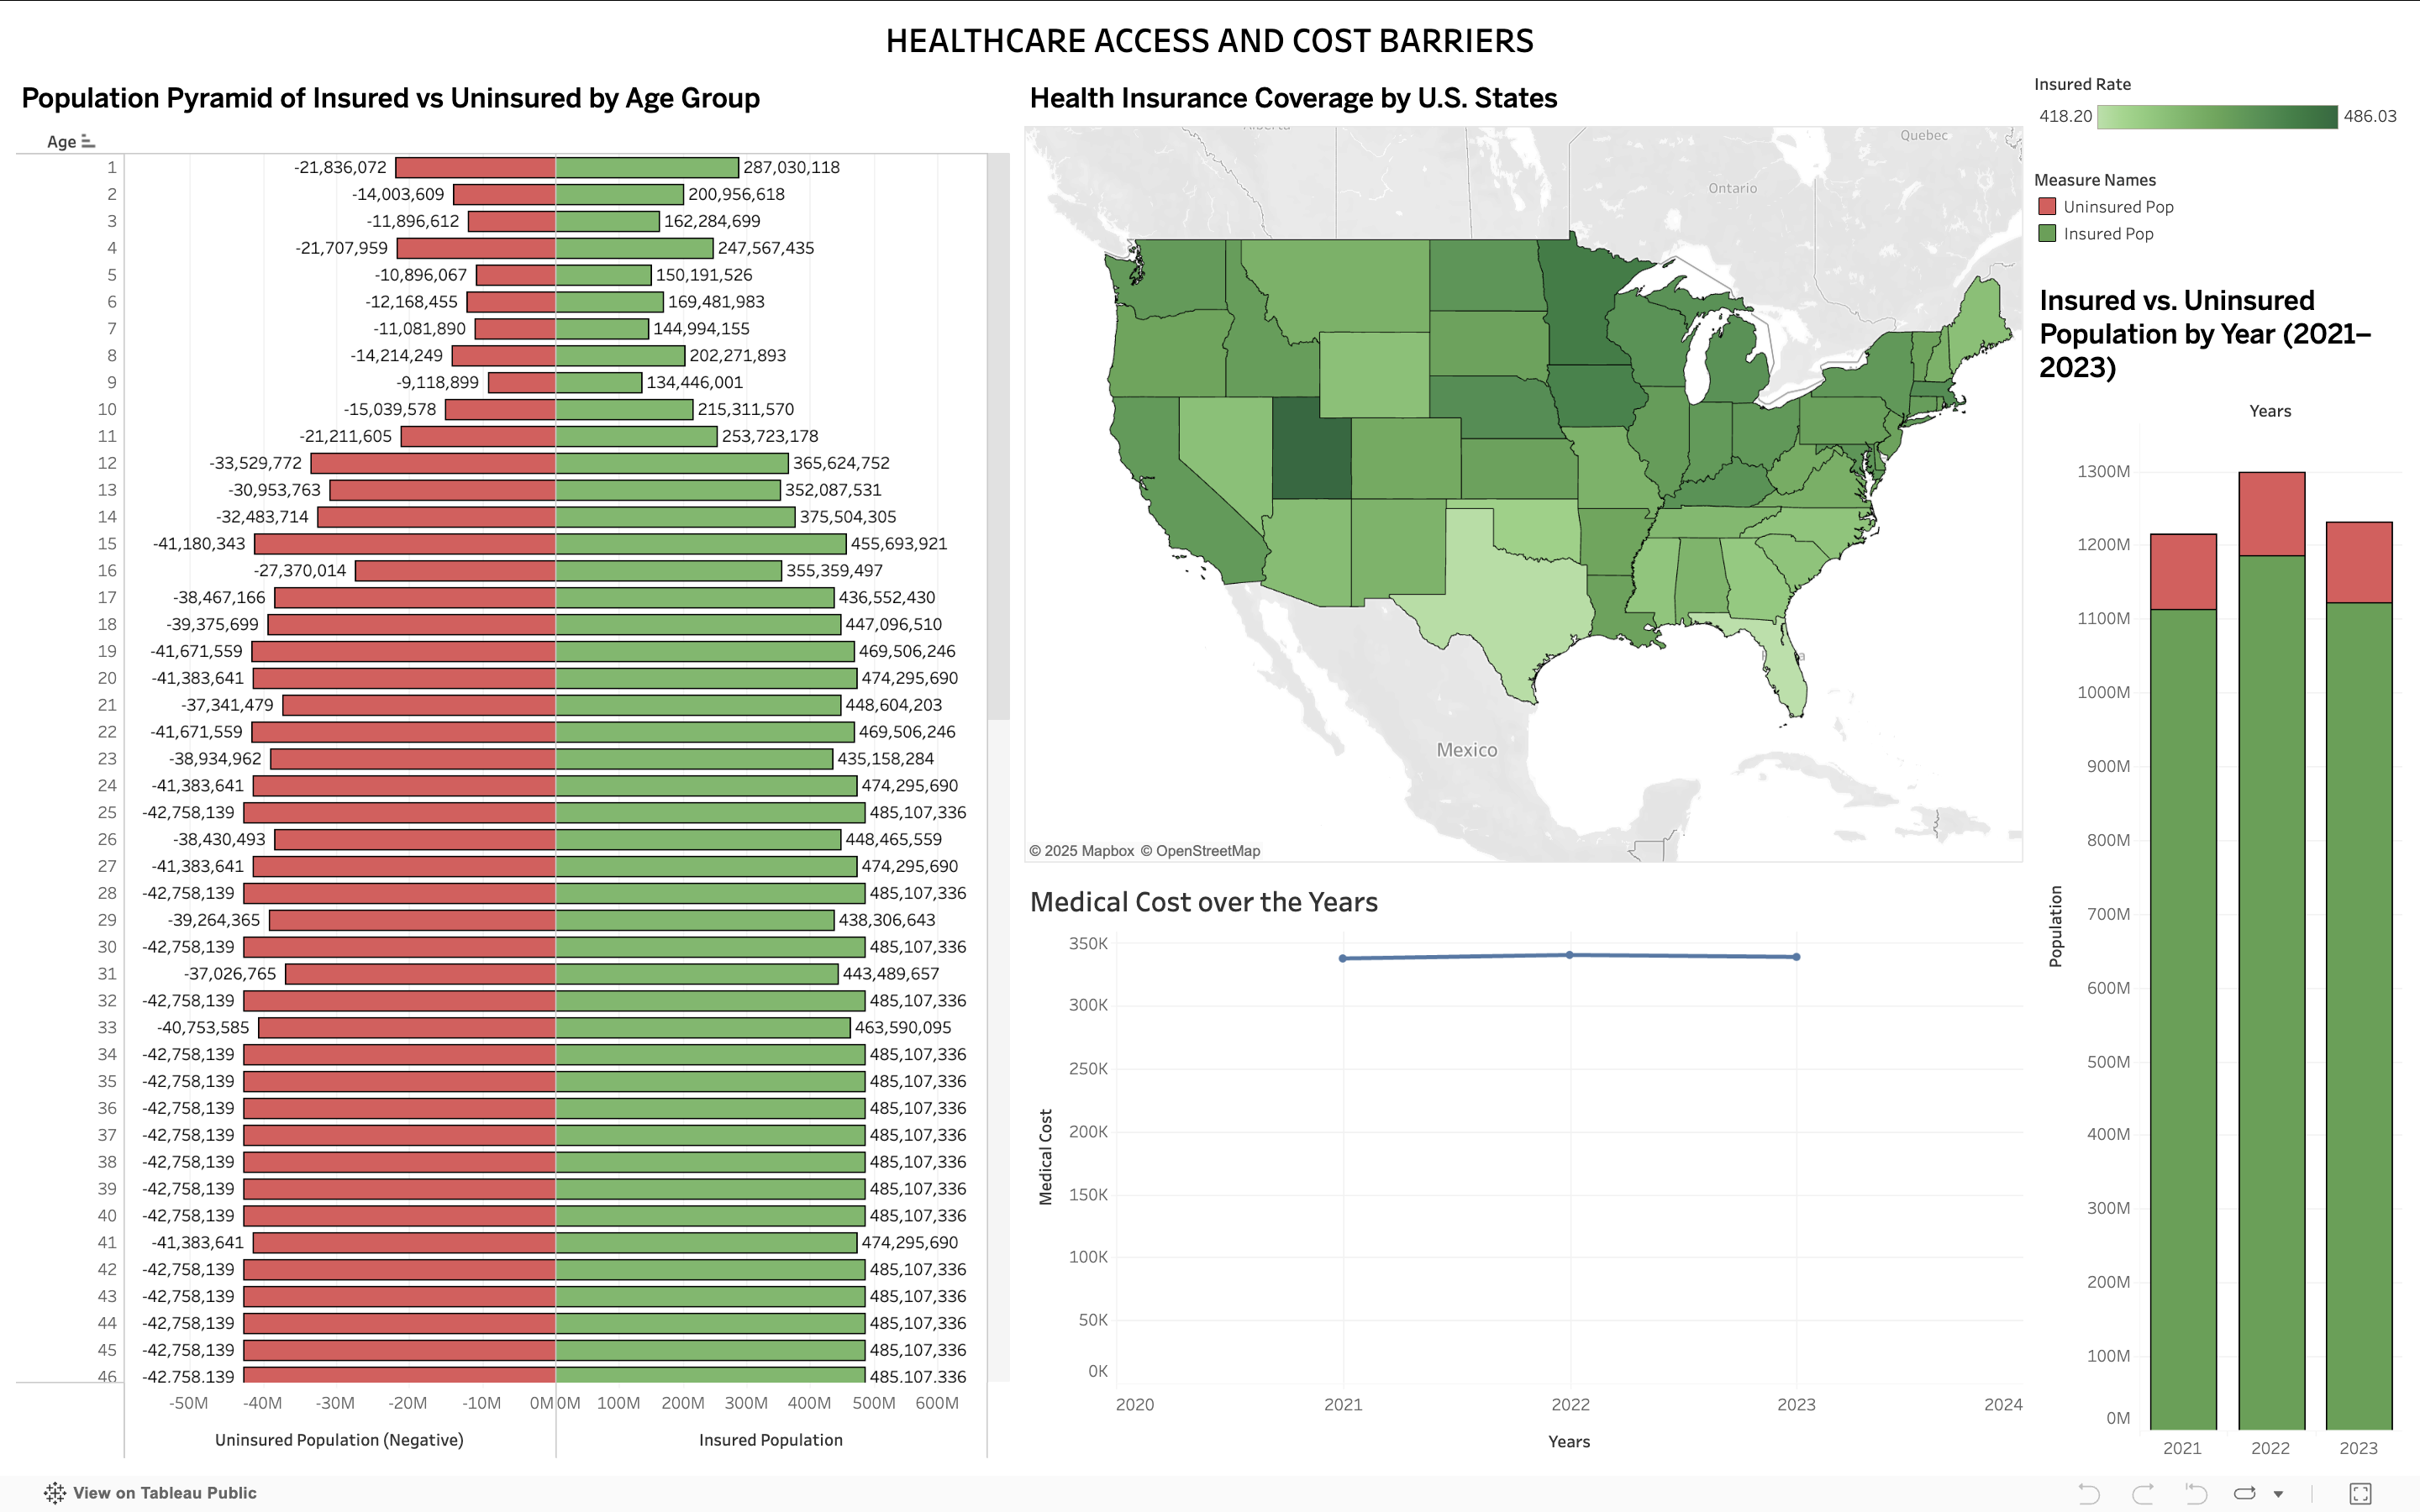

**Link 2: https://public.tableau.com/app/profile/parthvi.joshi/viz/BA775_Project_03_Dashboard2_17652298831240/Dashboard2#3

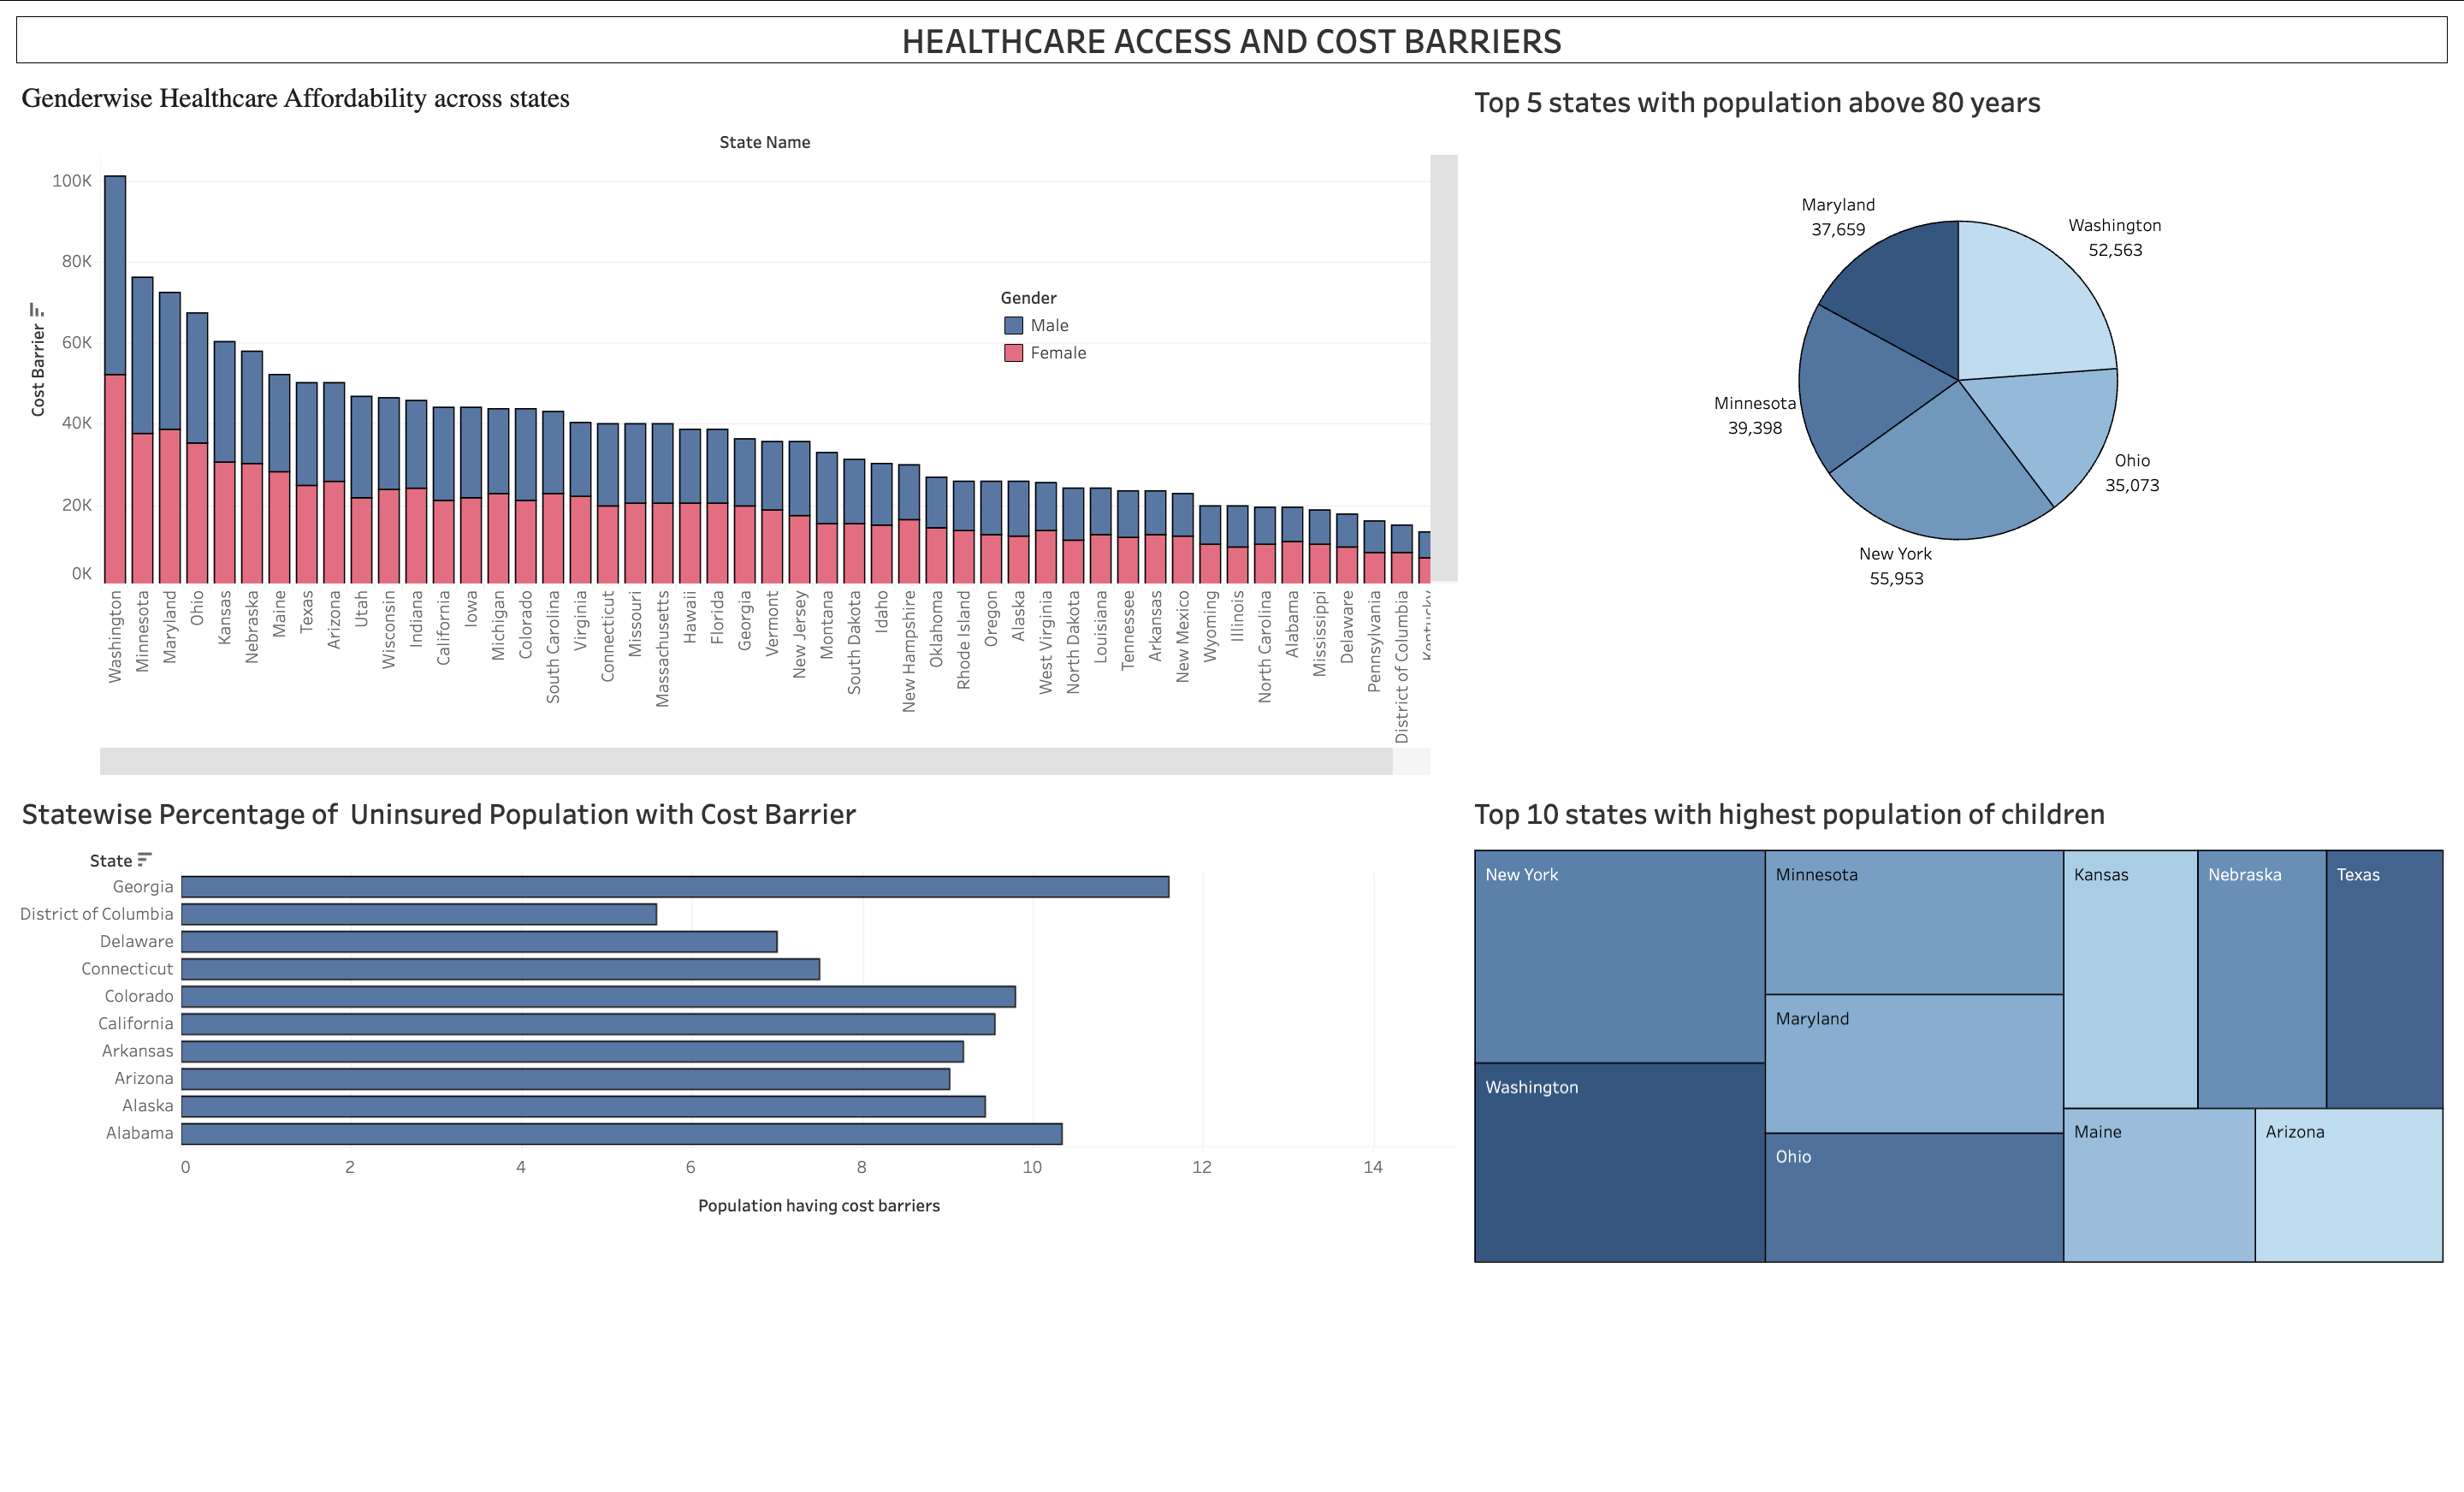

### Table of Content

**Problem Definition**

**Introduction & Motivation**

**ERD Diagram**

**Executive Summary**



**1.Data Source**
*  Behavioral Risk Factor Surveillance System (BFRFSS)
*  American Community Survey (ACS)



**2.Data Import & Cleaning**

2.1 Importing Data & Merging Data

2.2 Data Cleaning

2.3 Validation Queries

**3. Analysis & Findings**

3.1 Percentage of Adults Unable to See a Doctor Due to Cost

3.2 Demographic Groups and Healthcare Affordability

3.3 States and Insured Rates

3.4 States and Uninsured Rates

3.5 Cost Barriers Among the Uninsured

3.6 Cost Barriers Among the Insured

3.7 Median Household Income and Insured Rates

3.8 Median Household Income and Uninsured Rates

3.9 How have financial barriers to accessing medical care evolved year-over-year from 2020 to 2023 within each state?

3.10 Which 10 U.S. states and territories have the highest economic stress based on their maximum recorded poverty and uninsured rates?


**4. Conclusion**

**5. Challenges**

**6. References**

**7. Gen AI disclosure**



### Problem Definition

This project seeks to analyze how economic stress, captured through poverty levels and insurance coverage, affects Americans’ ability to afford medical care across different U.S. states. By integrating public health data from the CDC’s BRFSS and economic data from the U.S. Census Bureau’s ACS, the analysis identifies where and to what extent financial and coverage gaps restrict access to healthcare. Policymakers, healthcare organizations, and social programs care about these insights because they inform equitable resource allocation and guide health policy interventions under ongoing federal initiatives such as the ACA and Medicaid expansion. Success will be measured by the project’s ability to quantify the statistical relationship between poverty, uninsured rates, and the percentage of adults unable to see a doctor due to cost, producing evidence for targeting health equity improvements nationwide.

### Introduction & Motivation

Access to medical care in the United States remains unequal, and financial barriers continue to shape who receives timely healthcare and who does not. National surveillance surveys show that millions of adults report delaying or avoiding doctor visits because they cannot afford the cost. Yet this issue is not evenly distributed: states differ dramatically in poverty rates, insurance coverage, employment conditions, and household income. Understanding how economic stress translates into healthcare barriers is essential for policymakers, health systems, and community organizations aiming to design targeted interventions that advance health equity.

This analysis brings together two of the most comprehensive public datasets available—the CDC’s Behavioral Risk Factor Surveillance System (BRFSS) and the U.S. Census Bureau’s American Community Survey (ACS)—to quantify the relationship between poverty, insurance coverage, and the likelihood that adults report they “could not see a doctor due to cost.” By merging multi-year state-level economic indicators with individual health survey responses, this project provides evidence-based insight into how financial constraints shape real-world access to care.


### ERD Diagram

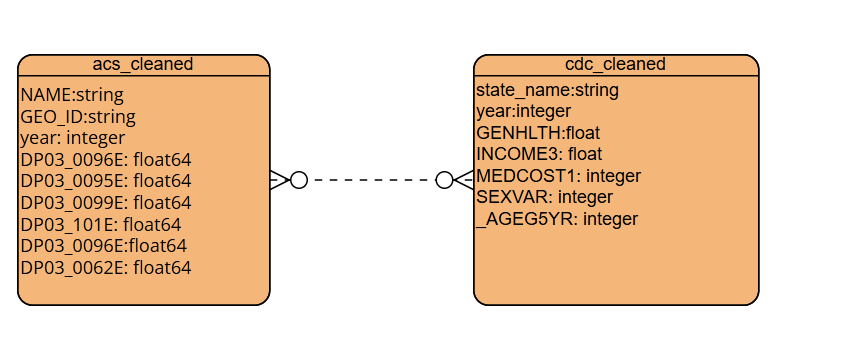

### Executive Summary

This project analyzes how economic stress, measured by poverty and insurance status, creates significant barriers to accessing medical care across the United States. Regionally, cost hurdles are most severe in the South and Southwest, with states like **Texas (14.89%) and Mississippi (12.71%)** reporting the highest percentage of adults unable to see a doctor due to cost. These states also lead in **uninsured rates (Texas: 17.46%)**. Demographically, **younger adults**, specifically those **aged 25–29 years (16.84%)**, and **women** face the **greatest financial vulnerability**. The persistent post-pandemic high cost barriers underscore that even insured residents in these regions face substantial underinsurance. Strategic and targetted policy interventions are required to bring structural changes that can create equitable healthcare access nationwide.

# **1. Data Sources**

**Behavioral Risk Factor Surveillance System (BRFSS):**

National health-related survey administered annually by the Centers for Disease Control and Prevention (CDC). Collects self-reported data on health behaviors, chronic conditions, and preventive service use among U.S. adults. The dataset includes variables such as income, insurance coverage, general health, and cost-related barriers to medical care. For this project, BRFSS provides the key dependent variable — the percentage of respondents reporting they “could not see a doctor due to cost.”

**License:** Public domain (U.S. Government data; unrestricted use)

**File-Used:** LLCP2021.XPT; LLCP2022.XPT; LLCP2023.XPT

**Size:** ~2 GB (≈400,000 respondents per year; ~2 million total records)

**Link:** https://www.cdc.gov/brfss/annual_data/annual_data.htm

---

**American Community Survey (ACS):**

Nationwide demographic and economic dataset produced by the U.S. Census Bureau, providing annual estimates on income, poverty, education, and health insurance coverage. For this study, ACS supplies key independent variables — including the percentage of the population below the poverty line, without health insurance, and median household income — aggregated at the state level to align with BRFSS data.

**License:** Public domain (U.S. Census Bureau; unrestricted use)

**File-Used:** ACSDP1Y2020.DP03-Data.csv; ACSDP1Y2021.DP03-Data.csv; ACSDP1Y2022.DP03-Data.csv; ACSDP1Y2023.DP03-Data.csv

**Size:** ~10 MB (50 records per year, ~500 total across 10+ selected indicators)

**Link:** https://data.census.gov/table?q=DP03

# **2. Data Import and Cleaning**

## 2.1 Importing Data & Merging Data

### ACS

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
-- Combines ACS data from four years (2020-2023) into a single dataset, and
-- a new "year" column with the corresponding year value (2020, 2021, 2022,
CREATE OR REPLACE TABLE `ba775-fallproject.ACS.ACS_merged` AS
SELECT *, 2020 AS year FROM `ba775-fallproject.ACS.ACS2020`
UNION ALL
SELECT *, 2021 AS year FROM `ba775-fallproject.ACS.ACS2021`
UNION ALL
SELECT *, 2022 AS year FROM `ba775-fallproject.ACS.ACS2022`
UNION ALL
SELECT *, 2023 AS year FROM `ba775-fallproject.ACS.ACS2023`
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=1, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

### CDC

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
-- Initially attempted to UNION ALL the three CDC tables (2021, 2022, 2023)
-- However, this failed because the tables have different column counts:
-- CDC2021: 304 columns, CDC2022: 327 columns, CDC2023: varies
-- Now identifying which columns are unique to each table so we can drop the unique columns
-- from each table. This will help us understand what data we're losing if we only keep common columns

SELECT column_name AS unique_to_2021
FROM `ba775-fallproject.CDC.INFORMATION_SCHEMA.COLUMNS`
WHERE table_name = 'CDC2021'
  AND column_name NOT IN (
    SELECT column_name FROM `ba775-fallproject.CDC.INFORMATION_SCHEMA.COLUMNS`
    WHERE table_name IN ('CDC2022', 'CDC2023')
  );

SELECT column_name AS unique_to_2022
FROM `ba775-fallproject.CDC.INFORMATION_SCHEMA.COLUMNS`
WHERE table_name = 'CDC2022'
  AND column_name NOT IN (
    SELECT column_name FROM `ba775-fallproject.CDC.INFORMATION_SCHEMA.COLUMNS`
    WHERE table_name IN ('CDC2021', 'CDC2023')
  );

SELECT column_name AS unique_to_2023
FROM `ba775-fallproject.CDC.INFORMATION_SCHEMA.COLUMNS`
WHERE table_name = 'CDC2023'
  AND column_name NOT IN (
    SELECT column_name FROM `ba775-fallproject.CDC.INFORMATION_SCHEMA.COLUMNS`
    WHERE table_name IN ('CDC2021', 'CDC2022')
  );
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=84, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
-- After identifying columns unique to each table, we're now dropping the unique columns
-- from CDC2023 to make it compatible with CDC2021 and CDC2022 for UNION ALL
-- CDC2023 had 82 unique columns that don't exist in the other two years,
CREATE OR REPLACE TABLE `ba775-fallproject.CDC.CDC2023_cleaned` AS
SELECT
  * EXCEPT (
    RESPSLC1, LANDSEX2, LNDSXBRT, CELLSEX2, CELSXBRT,
    PRIMINS1, EXRACT12, EXEROFT1, EXERHMM1, EXRACT22,
    EXEROFT2, EXERHMM2, STRENGTH, BPMEDS1, FALL12MN,
    FALLINJ5, SEATBELT, DRNKDRI2, COVIDPO1, COVIDSM1,
    COVIDACT, PSASUGS1, PCSTALK2, INDORTAN, NUMBURN3,
    SUNPRTCT, WKDAYOUT, WKENDOUT, CIMEMLO1, CDWORRY,
    CDDISCU1, CDHOUS1, CDSOCIA1, HASYMP1, HASYMP2,
    HASYMP3, HASYMP4, HASYMP5, HASYMP6, STRSYMP1,
    STRSYMP2, STRSYMP3, STRSYMP4, STRSYMP5, STRSYMP6,
    FIRSTAID, ASPIRIN, IMFVPLA4, COVACGE1, COVIDNU2,
    SDLONELY, _HLTHPL1, _HCVU653, METVL12_, METVL22_,
    MAXVO21_, FC601_, ACTIN13_, ACTIN23_, PADUR1_,
    PADUR2_, PAFREQ1_, PAFREQ2_, _MINAC12, _MINAC22,
    STRFREQ_, PAMISS3_, PAMIN13_, PAMIN23_, PA3MIN_,
    PAVIG13_, PAVIG23_, PA3VIGM_, _PACAT3, _PAINDX3,
    _PA150R4, _PA300R4, _PA30023, _PASTRNG, _PAREC3,
    _PASTAE3, _RFSEAT2, _RFSEAT3, _DRNKDRV
  )
FROM `ba775-fallproject.CDC.CDC2023`;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=1, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
-- After dropping unique columns from CDC2023, we now have the same column names across all tables
-- However, UNION ALL still fails because columns have INCOMPATIBLE DATA TYPES across years
-- PROBLEM DISCOVERED:
-- - CDC2021 stores most survey responses as INT64 (numeric codes)
-- - CDC2022 and CDC2023 store the same responses as FLOAT64 or STRING
-- - This inconsistency prevents direct merging without type conversion
SELECT
  c21.column_name,
  c21.data_type AS type_2021,
  c22.data_type AS type_2022,
  c23.data_type AS type_2023,
  CASE
    WHEN c21.data_type = c22.data_type AND c22.data_type = c23.data_type THEN 'MATCH'
    ELSE 'MISMATCH'
  END AS status
FROM `ba775-fallproject.CDC.INFORMATION_SCHEMA.COLUMNS` c21
INNER JOIN `ba775-fallproject.CDC.INFORMATION_SCHEMA.COLUMNS` c22
  ON c21.column_name = c22.column_name AND c22.table_name = 'CDC2022'
INNER JOIN `ba775-fallproject.CDC.INFORMATION_SCHEMA.COLUMNS` c23
  ON c21.column_name = c23.column_name AND c23.table_name = 'CDC2023'
WHERE c21.table_name = 'CDC2021'
ORDER BY
  CASE WHEN c21.data_type = c22.data_type AND c22.data_type = c23.data_type THEN 1 ELSE 0 END,
  c21.column_name;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=193, table_html='<table border="1" class="dataframe table table-striped ta…

Computation deferred. Computation will process 11.5 kB

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
-- Merge all three CDC tables with type casting for mismatched columns
CREATE OR REPLACE TABLE `ba775-fallproject.CDC.CDC_cleaned` AS
SELECT
  CAST(GENHLTH AS FLOAT64) AS GENHLTH,
  CAST(ACEADNED AS STRING)   AS ACEADNED,
  CAST(ACEADSAF AS STRING)   AS ACEADSAF,
  CAST(ACEDEPRS AS STRING)   AS ACEDEPRS,
  CAST(ACEDIVRC AS STRING)   AS ACEDIVRC,
  CAST(ACEDRINK AS STRING)   AS ACEDRINK,
  CAST(ACEDRUGS AS STRING)   AS ACEDRUGS,
  CAST(ACEHURT1 AS STRING)   AS ACEHURT1,
  CAST(ACEHVSEX AS STRING)   AS ACEHVSEX,
  CAST(ACEPRISN AS STRING)   AS ACEPRISN,
  CAST(ACEPUNCH AS STRING)   AS ACEPUNCH,
  CAST(ACESWEAR AS STRING)   AS ACESWEAR,
  CAST(ACETOUCH AS STRING)   AS ACETOUCH,
  CAST(ACETTHEM AS STRING)   AS ACETTHEM,
  CAST(ADDEPEV3 AS FLOAT64)  AS ADDEPEV3,
  CAST(ASTHMA3 AS FLOAT64)   AS ASTHMA3,
  CAST(ASTHNOW AS FLOAT64)   AS ASTHNOW,
  CAST(AVEDRNK3 AS FLOAT64)  AS AVEDRNK3,
  BIRTHSEX,
  BLDSTFIT,
  CAST(BLIND AS FLOAT64)     AS BLIND,
  CAST(CADULT1 AS FLOAT64)   AS CADULT1,
  CAST(CAGEG AS FLOAT64)     AS CAGEG,
  CAST(CAREGIV1 AS STRING)   AS CAREGIV1,
  CAST(CASTHDX2 AS FLOAT64)  AS CASTHDX2,
  CAST(CASTHNO2 AS FLOAT64)  AS CASTHNO2,
  CAST(CCLGHOUS AS FLOAT64) AS CCLGHOUS,
  CAST(CELLFON5 AS FLOAT64) AS CELLFON5,
  CAST(CELPHON1 AS FLOAT64) AS CELPHON1,
  CAST(CHCCOPD3 AS FLOAT64) AS CHCCOPD3,
  CAST(CHCKDNY2 AS FLOAT64) AS CHCKDNY2,
  CAST(CHECKUP1 AS FLOAT64) AS CHECKUP1,
  CAST(CHILDREN AS FLOAT64) AS CHILDREN,
  CAST(CSTATE1 AS FLOAT64) AS CSTATE1,
  CERVSCRN,
  CAST(CHKHEMO3 AS STRING) AS CHKHEMO3,
  COLGHOUS,
  COLNCNCR,
  COLNSIGM,
  COLNTES1,
  CAST(CRGVALZD AS STRING) AS CRGVALZD,
  CAST(CRGVEXPT AS STRING) AS CRGVEXPT,
  CAST(CRGVHOU1 AS STRING) AS CRGVHOU1,
  CAST(CRGVHRS1 AS STRING) AS CRGVHRS1,
  CAST(CRGVLNG1 AS STRING) AS CRGVLNG1,
  CAST(CRGVPER1 AS STRING) AS CRGVPER1,
  CAST(CRGVPRB3 AS STRING) AS CRGVPRB3,
  CAST(CRGVREL4 AS STRING) AS CRGVREL4,
  CRVCLCNC,
  CRVCLHPV,
  CRVCLPAP,
  HADSIGM4,
  CAST(HOWLONG AS STRING)  AS HOWLONG,
  CAST(IDATE AS STRING)    AS IDATE,
  CAST(IDAY AS STRING)     AS IDAY,
  CAST(IMONTH AS STRING)   AS IMONTH,
  CAST(INSULIN1 AS STRING) AS INSULIN1,
  CAST(IYEAR AS STRING)    AS IYEAR,
  LASTSIG4,
  LASTSMK2,
  LCSFIRST,
  LCSLAST,
  LCSNUMCG,
  CAST(LOADULK2 AS STRING) AS LOADULK2,
  CAST(MARIJAN1 AS STRING) AS MARIJAN1,
  CAST(HEIGHT3 AS FLOAT64) AS HEIGHT3,
  CAST(HHADULT AS FLOAT64) AS HHADULT,
  CAST(HIVTST7 AS FLOAT64) AS HIVTST7,
  CAST(HIVTSTD3 AS FLOAT64) AS HIVTSTD3,
  CAST(HTIN4 AS FLOAT64)   AS HTIN4,
  CAST(HTM4 AS FLOAT64)    AS HTM4,
  CAST(INCOME3 AS FLOAT64) AS INCOME3,
  CAST(LADULT1 AS FLOAT64) AS LADULT1,
  CAST(LANDLINE AS FLOAT64) AS LANDLINE,
  CAST(MARITAL AS FLOAT64) AS MARITAL,
  CAST(MAXDRNKS AS FLOAT64) AS MAXDRNKS,
  CAST(MEDCOST1 AS FLOAT64) AS MEDCOST1,
  CAST(MENTHLTH AS FLOAT64) AS MENTHLTH,
  CAST(MSCODE   AS FLOAT64) AS MSCODE,
  CAST(NUMADULT AS FLOAT64) AS NUMADULT,
  CAST(PERSDOC3 AS FLOAT64) AS PERSDOC3,
  CAST(PHYSHLTH AS FLOAT64) AS PHYSHLTH,
  CAST(PNEUVAC4 AS FLOAT64) AS PNEUVAC4,
  CAST(POORHLTH AS FLOAT64) AS POORHLTH,
  CAST(PREGNANT AS FLOAT64) AS PREGNANT,
  CAST(PVTRESD1 AS FLOAT64) AS PVTRESD1,
  CAST(PVTRESD3 AS FLOAT64) AS PVTRESD3,
  CAST(QSTLANG  AS FLOAT64) AS QSTLANG,
  CAST(QSTVER   AS FLOAT64) AS QSTVER,
  CAST(RCSRLTN2 AS FLOAT64) AS RCSRLTN2,
  CAST(RENTHOM1 AS FLOAT64) AS RENTHOM1,
  CAST(SAFETIME AS FLOAT64) AS SAFETIME,
  CAST(SMOKDAY2 AS FLOAT64) AS SMOKDAY2,
  CAST(SMOKE100 AS FLOAT64) AS SMOKE100,
  CAST(SOFEMALE AS FLOAT64) AS SOFEMALE,
  SDNATES1,
  CAST(SEQNO   AS STRING) AS SEQNO,
  CAST(SEXVAR  AS STRING) AS SEXVAR,
  SHINGLE2,
  SIGMTES1,
  SMALSTOL,
  STOLTEST,
  STOPSMK2,
  TETANUS1,
  VIRCOLO1,
  CAST(SOMALE AS FLOAT64)    AS SOMALE,
  CAST(STATERE1 AS FLOAT64)  AS STATERE1,
  CAST(TRNSGNDR AS FLOAT64)  AS TRNSGNDR,
  CAST(USENOW3 AS FLOAT64)   AS USENOW3,
  CAST(VETERAN3 AS FLOAT64)  AS VETERAN3,
  CAST(WEIGHT2 AS FLOAT64)   AS WEIGHT2,
  CAST(WTKG3 AS FLOAT64)     AS WTKG3,
  CAST(_AGE65YR AS FLOAT64)  AS _AGE65YR,
  CAST(_AGE80 AS FLOAT64)    AS _AGE80,
  CAST(_AGEG5YR AS FLOAT64)  AS _AGEG5YR,
  CAST(_AGE_G AS FLOAT64)    AS _AGE_G,
  CAST(_AIDTST4 AS FLOAT64)  AS _AIDTST4,
  CAST(_ASTHMS1 AS FLOAT64)  AS _ASTHMS1,
  CAST(_BMI5 AS FLOAT64)     AS _BMI5,
  CAST(_BMI5CAT AS FLOAT64)  AS _BMI5CAT,
  CAST(_CASTHM1 AS FLOAT64)  AS _CASTHM1,
  CAST(_CHISPNC AS FLOAT64)  AS _CHISPNC,
  CAST(_CHLDCNT AS FLOAT64)  AS _CHLDCNT,
  CAST(_DUALUSE AS FLOAT64)  AS _DUALUSE,
  CAST(_EDUCAG AS FLOAT64)   AS _EDUCAG,
  CAST(_FLSHOT7 AS FLOAT64)  AS _FLSHOT7,
  CAST(_HISPANC AS FLOAT64)   AS _HISPANC,
  CAST(_IMPRACE AS FLOAT64)   AS _IMPRACE,
  CAST(_INCOMG1 AS FLOAT64)   AS _INCOMG1,
  CAST(_LTASTH1 AS FLOAT64)   AS _LTASTH1,
  CAST(_MENT14D AS FLOAT64)   AS _MENT14D,
  CAST(_METSTAT AS FLOAT64)   AS _METSTAT,
  CAST(_MICHD AS FLOAT64)     AS _MICHD,
  CAST(_PHYS14D AS FLOAT64)   AS _PHYS14D,
  CAST(_PNEUMO3 AS FLOAT64)   AS _PNEUMO3,
  CAST(_PSU AS FLOAT64)       AS _PSU,
  CAST(_RFBMI5 AS FLOAT64)    AS _RFBMI5,
  CAST(_RFHLTH AS FLOAT64)    AS _RFHLTH,
  CAST(_RFSMOK3 AS FLOAT64)   AS _RFSMOK3,
  CAST(_SEX AS FLOAT64)       AS _SEX,
  CAST(_SMOKER3 AS FLOAT64)   AS _SMOKER3,
  CAST(_STATE AS INT64)     AS _STATE,
  CAST(_STSTR AS FLOAT64)     AS _STSTR,
  CAST(_TOTINDA AS FLOAT64)   AS _TOTINDA,
  CAST(_URBSTAT AS FLOAT64)   AS _URBSTAT,
  CNCRAGE,
  CNCRDIFF,
  CSRVCLIN,
  CSRVCTL2,
  CSRVDEIN,
  CSRVDOC1,
  CSRVINSR,
  CSRVINST,
  CSRVPAIN,
  CSRVRTRN,
  CSRVSUM,
  CSRVTRT3,
  HPVADSHT,
  HPVADVC4,
  PCPSARS2,
  PSATEST1,
  PSATIME1,
  _CLLCPWT,
  _DUALCOR,
  _LLCPWT,
  _LLCPWT2,
  _RAWRAKE,
  _STRWT,
  _WT2RAKE,
  2021 AS year
FROM `ba775-fallproject.CDC.CDC2021`

UNION ALL

SELECT
  GENHLTH,
  ACEADNED,
  ACEADSAF,
  ACEDEPRS,
  ACEDIVRC,
  ACEDRINK,
  ACEDRUGS,
  ACEHURT1,
  ACEHVSEX,
  ACEPRISN,
  ACEPUNCH,
  ACESWEAR,
  ACETOUCH,
  ACETTHEM,
  ADDEPEV3,
  ASTHMA3,
  ASTHNOW,
  AVEDRNK3,
  BIRTHSEX,
  CAST(BLDSTFIT AS STRING) AS BLDSTFIT,
  BLIND,
  CADULT1,
  CAGEG,
  CAREGIV1,
  CASTHDX2,
  CASTHNO2,
  CCLGHOUS,
  CELLFON5,
  CELPHON1,
  CHCCOPD3,
  CHCKDNY2,
  CHECKUP1,
  CHILDREN,
  CSTATE1,
  CAST(CERVSCRN AS STRING) AS CERVSCRN,
  CHKHEMO3,
  CAST(COLGHOUS AS STRING) AS COLGHOUS,
  CAST(COLNCNCR AS STRING) AS COLNCNCR,
  CAST(COLNSIGM AS STRING) AS COLNSIGM,
  CAST(COLNTES1 AS STRING) AS COLNTES1,
  CRGVALZD,
  CRGVEXPT,
  CRGVHOU1,
  CRGVHRS1,
  CRGVLNG1,
  CRGVPER1,
  CRGVPRB3,
  CRGVREL4,
  CAST(CRVCLCNC AS STRING) AS CRVCLCNC,
  CAST(CRVCLHPV AS STRING) AS CRVCLHPV,
  CAST(CRVCLPAP AS STRING) AS CRVCLPAP,
  CAST(HADSIGM4 AS STRING) AS HADSIGM4,
  CAST(HOWLONG AS STRING)  AS HOWLONG,
  CAST(IDATE AS STRING)    AS IDATE,
  CAST(IDAY AS STRING)     AS IDAY,
  CAST(IMONTH AS STRING)   AS IMONTH,
  INSULIN1,
  CAST(IYEAR AS STRING)    AS IYEAR,
  CAST(LASTSIG4 AS STRING) AS LASTSIG4,
  LASTSMK2,
  CAST(LCSFIRST AS STRING) AS LCSFIRST,
  CAST(LCSLAST AS STRING)  AS LCSLAST,
  CAST(LCSNUMCG AS STRING) AS LCSNUMCG,
  LOADULK2,
  MARIJAN1,
  HEIGHT3,
  HHADULT,
  HIVTST7,
  HIVTSTD3,
  HTIN4,
  HTM4,
  INCOME3,
  LADULT1,
  LANDLINE,
  MARITAL,
  MAXDRNKS,
  MEDCOST1,
  MENTHLTH,
  MSCODE,
  NUMADULT,
  PERSDOC3,
  PHYSHLTH,
  PNEUVAC4,
  POORHLTH,
  PREGNANT,
  PVTRESD1,
  PVTRESD3,
  QSTLANG,
  QSTVER,
  RCSRLTN2,
  RENTHOM1,
  SAFETIME,
  SMOKDAY2,
  SMOKE100,
  SOFEMALE,
  CAST(SDNATES1 AS STRING) AS SDNATES1,
  CAST(SEQNO    AS STRING) AS SEQNO,
  CAST(SEXVAR   AS STRING) AS SEXVAR,
  SHINGLE2,
  CAST(SIGMTES1 AS STRING) AS SIGMTES1,
  CAST(SMALSTOL AS STRING) AS SMALSTOL,
  CAST(STOLTEST AS STRING)   AS STOLTEST,
  STOPSMK2,
  CAST(TETANUS1 AS STRING)   AS TETANUS1,
  CAST(VIRCOLO1 AS STRING)   AS VIRCOLO1,
  SOMALE,
  STATERE1,
  TRNSGNDR,
  USENOW3,
  VETERAN3,
  WEIGHT2,
  WTKG3,
  _AGE65YR,
  _AGE80,
  _AGEG5YR,
  _AGE_G,
  _AIDTST4,
  _ASTHMS1,
  _BMI5,
  _BMI5CAT,
  _CASTHM1,
  _CHISPNC,
  _CHLDCNT,
  _DUALUSE,
  _EDUCAG,
  _FLSHOT7,
  _HISPANC,
  _IMPRACE,
  _INCOMG1,
  _LTASTH1,
  _MENT14D,
  _METSTAT,
  _MICHD,
  _PHYS14D,
  _PNEUMO3,
  _PSU,
  _RFBMI5,
  _RFHLTH,
  _RFSMOK3,
  _SEX,
  _SMOKER3,
  CAST(_STATE AS INT64) AS _STATE,
  _STSTR,
  _TOTINDA,
  _URBSTAT,
  CNCRAGE,
  CNCRDIFF,
  CSRVCLIN,
  CSRVCTL2,
  CSRVDEIN,
  CSRVDOC1,
  CSRVINSR,
  CSRVINST,
  CSRVPAIN,
  CSRVRTRN,
  CSRVSUM,
  CSRVTRT3,
  HPVADSHT,
  HPVADVC4,
  PCPSARS2,
  PSATEST1,
  PSATIME1,
  _CLLCPWT,
  _DUALCOR,
  _LLCPWT,
  _LLCPWT2,
  _RAWRAKE,
  _STRWT,
  _WT2RAKE,
  2022 AS year
FROM `ba775-fallproject.CDC.CDC2022`

UNION ALL

SELECT
  GENHLTH,
  ACEADNED,
  ACEADSAF,
  ACEDEPRS,
  ACEDIVRC,
  ACEDRINK,
  ACEDRUGS,
  ACEHURT1,
  ACEHVSEX,
  ACEPRISN,
  ACEPUNCH,
  ACESWEAR,
  ACETOUCH,
  ACETTHEM,
  ADDEPEV3,
  ASTHMA3,
  ASTHNOW,
  AVEDRNK3,
  CAST(BIRTHSEX AS STRING) AS BIRTHSEX,
  BLDSTFIT,
  BLIND,
  CADULT1,
  CAGEG,
  CAST(CAREGIV1 AS STRING) AS CAREGIV1,
  CASTHDX2,
  CASTHNO2,
  CCLGHOUS,
  CELLFON5,
  CELPHON1,
  CHCCOPD3,
  CHCKDNY2,
  CHECKUP1,
  CHILDREN,
  CSTATE1,
  CERVSCRN,
  CAST(CHKHEMO3 AS STRING) AS CHKHEMO3,
  COLGHOUS,
  COLNCNCR,
  COLNSIGM,
  COLNTES1,
  CAST(CRGVALZD AS STRING) AS CRGVALZD,
  CAST(CRGVEXPT AS STRING) AS CRGVEXPT,
  CAST(CRGVHOU1 AS STRING) AS CRGVHOU1,
  CAST(CRGVHRS1 AS STRING) AS CRGVHRS1,
  CAST(CRGVLNG1 AS STRING) AS CRGVLNG1,
  CAST(CRGVPER1 AS STRING) AS CRGVPER1,
  CAST(CRGVPRB3 AS STRING) AS CRGVPRB3,
  CAST(CRGVREL4 AS STRING) AS CRGVREL4,
  CRVCLCNC,
  CRVCLHPV,
  CRVCLPAP,
  HADSIGM4,
  HOWLONG,
  IDATE,
  IDAY,
  IMONTH,
  CAST(INSULIN1 AS STRING) AS INSULIN1,
  IYEAR,
  LASTSIG4,
  CAST(LASTSMK2 AS STRING) AS LASTSMK2,
  LCSFIRST,
  LCSLAST,
  LCSNUMCG,
  CAST(LOADULK2 AS STRING) AS LOADULK2,
  MARIJAN1,
  HEIGHT3,
  HHADULT,
  HIVTST7,
  HIVTSTD3,
  HTIN4,
  HTM4,
  INCOME3,
  LADULT1,
  LANDLINE,
  MARITAL,
  MAXDRNKS,
  MEDCOST1,
  MENTHLTH,
  MSCODE,
  NUMADULT,
  PERSDOC3,
  PHYSHLTH,
  PNEUVAC4,
  POORHLTH,
  PREGNANT,
  PVTRESD1,
  PVTRESD3,
  QSTLANG,
  QSTVER,
  RCSRLTN2,
  RENTHOM1,
  SAFETIME,
  SMOKDAY2,
  SMOKE100,
  SOFEMALE,
  SDNATES1,
  SEQNO,
  CAST(SEXVAR AS STRING) AS SEXVAR,
  CAST(SHINGLE2 AS STRING) AS SHINGLE2,
  SIGMTES1,
  SMALSTOL,
  STOLTEST,
  CAST(STOPSMK2 AS STRING)   AS STOPSMK2,
  TETANUS1,
  VIRCOLO1,
  SOMALE,
  STATERE1,
  TRNSGNDR,
  USENOW3,
  VETERAN3,
  WEIGHT2,
  WTKG3,
  _AGE65YR,
  _AGE80,
  _AGEG5YR,
  _AGE_G,
  _AIDTST4,
  _ASTHMS1,
  _BMI5,
  _BMI5CAT,
  _CASTHM1,
  _CHISPNC,
  _CHLDCNT,
  _DUALUSE,
  _EDUCAG,
  _FLSHOT7,
  _HISPANC,
  _IMPRACE,
  _INCOMG1,
  _LTASTH1,
  _MENT14D,
  _METSTAT,
  _MICHD,
  _PHYS14D,
  _PNEUMO3,
  _PSU,
  _RFBMI5,
  _RFHLTH,
  _RFSMOK3,
  _SEX,
  _SMOKER3,
  CAST(_STATE AS INT64) AS _STATE,
  _STSTR,
  _TOTINDA,
  _URBSTAT,
  CNCRAGE,
  CNCRDIFF,
  CSRVCLIN,
  CSRVCTL2,
  CSRVDEIN,
  CSRVDOC1,
  CSRVINSR,
  CSRVINST,
  CSRVPAIN,
  CSRVRTRN,
  CSRVSUM,
  CSRVTRT3,
  HPVADSHT,
  HPVADVC4,
  PCPSARS2,
  PSATEST1,
  PSATIME1,
  _CLLCPWT,
  _DUALCOR,
  _LLCPWT,
  _LLCPWT2,
  _RAWRAKE,
  _STRWT,
  _WT2RAKE,
  2023 AS year
FROM `ba775-fallproject.CDC.CDC2023`
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=1, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

## 2.2 Data Cleaning

###ACS

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
-- ----------------------------------------------------------------------------
-- ACS DATA: Check for NULL values in key columns
-- ----------------------------------------------------------------------------

-- Check NULL counts for all important ACS columns
SELECT
  'ACS Data Quality Check' AS dataset,
  COUNT(*) AS total_records,
  COUNTIF(NAME IS NULL) AS null_state_names,
  COUNTIF(year IS NULL) AS null_years,
  COUNTIF(DP03_0099E IS NULL) AS null_total_population,
  COUNTIF(DP03_0100E IS NULL) AS null_insured_population,
  COUNTIF(DP03_0101E IS NULL) AS null_uninsured_population,
  COUNTIF(DP03_0051E IS NULL) AS null_mean_income,
  COUNTIF(DP03_0062E IS NULL) AS null_median_income,
  -- Calculate percentage of records with any NULL in critical fields
  ROUND(COUNTIF(
    NAME IS NULL OR
    year IS NULL OR
    DP03_0099E IS NULL OR
    DP03_0100E IS NULL OR
    DP03_0101E IS NULL
  ) * 100.0 / COUNT(*), 2) AS pct_records_with_critical_nulls
FROM `ba775-fallproject.ACS.ACS_merged`;

-- Detailed breakdown by year
SELECT
  year,
  COUNT(*) AS total_records,
  COUNTIF(DP03_0099E IS NULL) AS null_total_population,
  COUNTIF(DP03_0100E IS NULL) AS null_insured_population,
  COUNTIF(DP03_0101E IS NULL) AS null_uninsured_population,
  COUNTIF(DP03_0051E IS NULL) AS null_mean_income,
  COUNTIF(DP03_0062E IS NULL) AS null_median_income
FROM `ba775-fallproject.ACS.ACS_merged`
GROUP BY year
ORDER BY year;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=4, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

###CDC


In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
CREATE OR REPLACE TABLE `ba775-fallproject.CDC.CDC_cleaned` AS
SELECT
  CASE
    WHEN _STATE = 1 THEN 'Alabama'
    WHEN _STATE = 2 THEN 'Alaska'
    WHEN _STATE = 4 THEN 'Arizona'
    WHEN _STATE = 5 THEN 'Arkansas'
    WHEN _STATE = 6 THEN 'California'
    WHEN _STATE = 8 THEN 'Colorado'
    WHEN _STATE = 9 THEN 'Connecticut'
    WHEN _STATE = 10 THEN 'Delaware'
    WHEN _STATE = 11 THEN 'District of Columbia'
    WHEN _STATE = 12 THEN 'Florida'
    WHEN _STATE = 13 THEN 'Georgia'
    WHEN _STATE = 15 THEN 'Hawaii'
    WHEN _STATE = 16 THEN 'Idaho'
    WHEN _STATE = 17 THEN 'Illinois'
    WHEN _STATE = 18 THEN 'Indiana'
    WHEN _STATE = 19 THEN 'Iowa'
    WHEN _STATE = 20 THEN 'Kansas'
    WHEN _STATE = 21 THEN 'Kentucky'
    WHEN _STATE = 22 THEN 'Louisiana'
    WHEN _STATE = 23 THEN 'Maine'
    WHEN _STATE = 24 THEN 'Maryland'
    WHEN _STATE = 25 THEN 'Massachusetts'
    WHEN _STATE = 26 THEN 'Michigan'
    WHEN _STATE = 27 THEN 'Minnesota'
    WHEN _STATE = 28 THEN 'Mississippi'
    WHEN _STATE = 29 THEN 'Missouri'
    WHEN _STATE = 30 THEN 'Montana'
    WHEN _STATE = 31 THEN 'Nebraska'
    WHEN _STATE = 32 THEN 'Nevada'
    WHEN _STATE = 33 THEN 'New Hampshire'
    WHEN _STATE = 34 THEN 'New Jersey'
    WHEN _STATE = 35 THEN 'New Mexico'
    WHEN _STATE = 36 THEN 'New York'
    WHEN _STATE = 37 THEN 'North Carolina'
    WHEN _STATE = 38 THEN 'North Dakota'
    WHEN _STATE = 39 THEN 'Ohio'
    WHEN _STATE = 40 THEN 'Oklahoma'
    WHEN _STATE = 41 THEN 'Oregon'
    WHEN _STATE = 42 THEN 'Pennsylvania'
    WHEN _STATE = 44 THEN 'Rhode Island'
    WHEN _STATE = 45 THEN 'South Carolina'
    WHEN _STATE = 46 THEN 'South Dakota'
    WHEN _STATE = 47 THEN 'Tennessee'
    WHEN _STATE = 48 THEN 'Texas'
    WHEN _STATE = 49 THEN 'Utah'
    WHEN _STATE = 50 THEN 'Vermont'
    WHEN _STATE = 51 THEN 'Virginia'
    WHEN _STATE = 53 THEN 'Washington'
    WHEN _STATE = 54 THEN 'West Virginia'
    WHEN _STATE = 55 THEN 'Wisconsin'
    WHEN _STATE = 56 THEN 'Wyoming'
    ELSE 'Unknown'
  END AS state_name,
  *
FROM `ba775-fallproject.CDC.CDC_cleaned`;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=1, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT
  'CDC Data Quality Check' AS dataset,
  COUNT(*) AS total_records,
  COUNTIF(_STATE IS NULL) AS null_state_codes,
  COUNTIF(year IS NULL) AS null_years,
  COUNTIF(MEDCOST1 IS NULL) AS null_medical_cost,
  COUNTIF(INCOME3 IS NULL) AS null_income,
  COUNTIF(GENHLTH IS NULL) AS null_general_health,
  COUNTIF(PERSDOC3 IS NULL) AS null_personal_doctor,
  -- Calculate percentage of records with any NULL in critical fields
  ROUND(COUNTIF(
    _STATE IS NULL OR
    year IS NULL OR
    MEDCOST1 IS NULL OR
    INCOME3 IS NULL
  ) * 100.0 / COUNT(*), 2) AS pct_records_with_critical_nulls
FROM `ba775-fallproject.CDC.CDC_cleaned`;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=1, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT
  year,
  COUNT(*) AS total_records,
  COUNTIF(_STATE IS NULL) AS null_state_codes,
  COUNTIF(MEDCOST1 IS NULL) AS null_medical_cost,
  COUNTIF(INCOME3 IS NULL) AS null_income,
  COUNTIF(GENHLTH IS NULL) AS null_general_health,
  COUNTIF(PERSDOC3 IS NULL) AS null_personal_doctor,
  COUNTIF(_LLCPWT IS NULL) AS null_weights
FROM `ba775-fallproject.CDC.CDC_cleaned`
GROUP BY year
ORDER BY year;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=3, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT
  _STATE AS state_code,
  COUNT(*) AS record_count,
  COUNTIF(MEDCOST1 IS NULL) AS null_medical_cost_responses
FROM `ba775-fallproject.CDC.CDC_cleaned`
WHERE _STATE IS NULL OR CAST(_STATE AS INT64) NOT BETWEEN 1 AND 56
GROUP BY _STATE
ORDER BY record_count DESC;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=3, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT
  CAST(_STATE AS INT64) AS state_code,
  COUNT(*) AS total_records,
  COUNTIF(MEDCOST1 IS NULL) AS null_medcost,
  COUNTIF(INCOME3 IS NULL) AS null_income,
  COUNTIF(GENHLTH IS NULL) AS null_genhlth,
  COUNTIF(PERSDOC3 IS NULL) AS null_persdoc,
  COUNTIF(_LLCPWT IS NULL) AS null_weights,
  -- Percentage with nulls
  ROUND(COUNTIF(MEDCOST1 IS NULL) * 100.0 / COUNT(*), 2) AS pct_null_medcost,
  ROUND(COUNTIF(INCOME3 IS NULL) * 100.0 / COUNT(*), 2) AS pct_null_income,
  ROUND(COUNTIF(GENHLTH IS NULL) * 100.0 / COUNT(*), 2) AS pct_null_genhlth
FROM `ba775-fallproject.CDC.CDC_cleaned`
WHERE _STATE IS NOT NULL
GROUP BY state_code
ORDER BY state_code;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=54, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT
  'MEDCOST1 (Could not afford doctor)' AS question,
  COUNT(*) AS total_records,
  COUNTIF(MEDCOST1 IS NOT NULL AND MEDCOST1 NOT IN (7.0, 9.0)) AS valid_responses,
  COUNTIF(MEDCOST1 = 7.0) AS dont_know_refused,
  COUNTIF(MEDCOST1 = 9.0) AS missing,
  COUNTIF(MEDCOST1 IS NULL) AS null_values,
  ROUND(COUNTIF(MEDCOST1 IS NOT NULL AND MEDCOST1 NOT IN (7.0, 9.0)) * 100.0 / COUNT(*), 2) AS response_rate_pct
FROM `ba775-fallproject.CDC.CDC_cleaned`

UNION ALL

SELECT
  'INCOME3 (Income level)' AS question,
  COUNT(*) AS total_records,
  COUNTIF(INCOME3 IS NOT NULL AND INCOME3 NOT IN (77.0, 99.0)) AS valid_responses,
  COUNTIF(INCOME3 = 77.0) AS dont_know_refused,
  COUNTIF(INCOME3 = 99.0) AS missing,
  COUNTIF(INCOME3 IS NULL) AS null_values,
  ROUND(COUNTIF(INCOME3 IS NOT NULL AND INCOME3 NOT IN (77.0, 99.0)) * 100.0 / COUNT(*), 2) AS response_rate_pct
FROM `ba775-fallproject.CDC.CDC_cleaned`

UNION ALL

SELECT
  'GENHLTH (General health)' AS question,
  COUNT(*) AS total_records,
  COUNTIF(GENHLTH IS NOT NULL AND GENHLTH NOT IN (7.0, 9.0)) AS valid_responses,
  COUNTIF(GENHLTH = 7.0) AS dont_know_refused,
  COUNTIF(GENHLTH = 9.0) AS missing,
  COUNTIF(GENHLTH IS NULL) AS null_values,
  ROUND(COUNTIF(GENHLTH IS NOT NULL AND GENHLTH NOT IN (7.0, 9.0)) * 100.0 / COUNT(*), 2) AS response_rate_pct
FROM `ba775-fallproject.CDC.CDC_cleaned`;

""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=3, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

###Validation Queries

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
-- Show row counts BEFORE cleaning
SELECT
  'Before Cleaning (Raw CDC_cleaned)' AS status,
  COUNT(*) AS total_records,
  COUNT(DISTINCT CAST(_STATE AS INT64)) AS unique_states,
  -- Show how many rows have issues
  COUNTIF(CAST(_STATE AS INT64) NOT BETWEEN 1 AND 56
          OR CAST(_STATE AS INT64) IN (66, 72, 78)) AS invalid_states,
  COUNTIF(MEDCOST1 IS NULL OR MEDCOST1 IN (7, 9)) AS invalid_medcost,
  COUNTIF(INCOME3 IS NULL OR INCOME3 IN (77, 99)) AS invalid_income,
  COUNTIF(GENHLTH IS NULL OR GENHLTH IN (7, 9)) AS invalid_genhlth,
  COUNTIF(_LLCPWT IS NULL) AS missing_weights
FROM `ba775-fallproject.CDC.CDC_cleaned`;

-- Now create the truly cleaned table
CREATE OR REPLACE TABLE `ba775-fallproject.CDC.CDC_cleaned` AS
SELECT *
FROM `ba775-fallproject.CDC.CDC_cleaned`
WHERE
  CAST(_STATE AS INT64) BETWEEN 1 AND 56
  AND CAST(_STATE AS INT64) NOT IN (66, 72, 78)
  AND MEDCOST1 IS NOT NULL
  AND INCOME3 IS NOT NULL
  AND GENHLTH IS NOT NULL
  AND _LLCPWT IS NOT NULL
  AND MEDCOST1 NOT IN (7, 9)
  AND INCOME3 NOT IN (77, 99)
  AND GENHLTH NOT IN (7, 9);

-- Show row counts AFTER cleaning
SELECT
  'After Cleaning (CDC_final_cleaned)' AS status,
  COUNT(*) AS total_records,
  COUNT(DISTINCT CAST(_STATE AS INT64)) AS unique_states,
  COUNTIF(CAST(_STATE AS INT64) NOT BETWEEN 1 AND 56
          OR CAST(_STATE AS INT64) IN (66, 72, 78)) AS invalid_states,
  COUNTIF(MEDCOST1 IS NULL OR MEDCOST1 IN (7, 9)) AS invalid_medcost,
  COUNTIF(INCOME3 IS NULL OR INCOME3 IN (77, 99)) AS invalid_income,
  COUNTIF(GENHLTH IS NULL OR GENHLTH IN (7, 9)) AS invalid_genhlth,
  COUNTIF(_LLCPWT IS NULL) AS missing_weights
FROM `ba775-fallproject.CDC.CDC_cleaned`;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=1, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
-- Show row counts BEFORE cleaning
SELECT
  'Before Cleaning (Raw ACS_merged)' AS status,
  COUNT(*) AS total_records,
  COUNT(DISTINCT NAME) AS unique_states,
  COUNTIF(NAME IS NULL) AS null_names,
  COUNTIF(DP03_0099E IS NULL) AS null_total_pop,
  COUNTIF(DP03_0100E IS NULL) AS null_insured,
  COUNTIF(DP03_0062E IS NULL) AS null_median_income
FROM `ba775-fallproject.ACS.ACS_merged`;

-- Create cleaned ACS table
CREATE OR REPLACE TABLE `ba775-fallproject.ACS.ACS_cleaned` AS
SELECT *
FROM `ba775-fallproject.ACS.ACS_merged`
WHERE
  NAME IS NOT NULL
  AND year IS NOT NULL
  AND DP03_0099E IS NOT NULL
  AND DP03_0100E IS NOT NULL
  AND DP03_0101E IS NOT NULL
  AND DP03_0062E IS NOT NULL;

-- Show row counts AFTER cleaning
SELECT
  'After Cleaning (ACS_final_cleaned)' AS status,
  COUNT(*) AS total_records,
  COUNT(DISTINCT NAME) AS unique_states,
  COUNTIF(NAME IS NULL) AS null_names,
  COUNTIF(DP03_0099E IS NULL) AS null_total_pop,
  COUNTIF(DP03_0100E IS NULL) AS null_insured,
  COUNTIF(DP03_0062E IS NULL) AS null_median_income
FROM `ba775-fallproject.ACS.ACS_cleaned`;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=1, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

###Data Cleaning Summary

#### CDC BRFSS Dataset
- **Before Cleaning**: 1,317,148 total records
- **Issues Identified**:
  - Invalid state codes for territories (Guam=66, Puerto Rico=72, Virgin Islands=78)
  - Missing responses in critical variables (MEDCOST1, INCOME3, GENHLTH)
  - Survey non-responses coded as 7 (Don't Know) and 9 (Refused/Missing)
  - Missing survey weights (_LLCPWT) which are essential for population-level estimates
- **After Cleaning**: 1,016,047 records
- **Records Removed**: 301,101 records (22.9%)

#### ACS Dataset  
- **Before Cleaning**: 208 total records (52 states × 4 years)
- **Issues Identified**:
  - No NULL values found in critical columns (NAME, year, population, insurance, income)
- **After Cleaning**: 208 records (no records removed)
- **Records Removed**: 0 records (0%)



# **3. Analysis and Findings**

This section reflects the questions that we explored and the analysis that we derived from our dataset.

## 3.1 Percentage of Adults Unable to See a Doctor Due to Cost

**Q - What percentage of respondents reported that they “could not see a doctor due to cost” in each state?**


This table shows the percentage of adults in each U.S. state who reported that they “could not see a doctor due to cost.”

**Regional and Economic Insights**

- States such as Texas (14.89%), Mississippi (12.71%), and Tennessee (11.95%) record the highest shares of residents unable to see a doctor due to cost, underscoring the persistence of financial barriers in accessing care. These states are largely concentrated in the Southern U.S., a region historically associated with higher poverty rates, lower insurance coverage, and limited Medicaid expansion, all of which contribute to affordability challenges.

- In contrast, states with lower reported percentages (not shown in this top 10 list) typically feature higher average incomes and broader health coverage, which reduce cost-related barriers and enable more equitable healthcare access.

**Implications for Health Equity**

- The findings provide strong evidence that economic vulnerability and healthcare access are closely linked.

- In states where a higher proportion of residents cannot afford medical visits, individuals are more likely to delay care, avoid preventive services, and experience worsening health outcomes, further widening regional health disparities.

**Business Insight**

To reduce these disparities, policymakers and healthcare organizations can focus on:

- Expanding Medicaid eligibility and outreach in high-cost-barrier states,

- Enhancing affordable insurance options for low-income populations, and

- Investing in preventive and community health programs that lower the cost of essential care.

Such interventions can alleviate financial stress, promote earlier care-seeking, and improve long-term health outcomes—supporting both population well-being and economic stability across states.

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
-- Q1)What percentage of respondents in each state reported that they “could not see a doctor due to cost”?

SELECT
  c.state_name AS state,
  ROUND(
    SAFE_DIVIDE(
      COUNTIF(SAFE_CAST(c.MEDCOST1 AS INT64) = 1),
      COUNTIF(SAFE_CAST(c.MEDCOST1 AS INT64) IN (1, 2))
    ) * 100,
    2
  ) AS pct_could_not_see_doctor,
  COUNT(*) AS number_could_not_see_doctor
FROM
  `ba775-fallproject.CDC.CDC_cleaned` AS c
WHERE
  SAFE_CAST(c.MEDCOST1 AS INT64) IN (1, 2)
GROUP BY
  c.state_name
ORDER BY
  pct_could_not_see_doctor DESC;

""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=51, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

## 3.2 Demographic Groups and Healthcare Affordability

**Q  - Which age and gender groups struggle most with healthcare costs?**

This analysis examines how age and gender influence the likelihood of reporting that one “could not see a doctor due to cost.” The results reveal that younger adults—particularly women—face the greatest financial barriers to healthcare access.

**Age-Based Patterns**

Younger adults experience the most pronounced cost challenges.

- Respondents aged 25–29 years (16.84%) report the highest rate of being unable to afford a doctor visit, followed by those aged 30–34 (14.36%) and 18–24 (13.66%). These early working-age groups often face unstable employment, lower wages, and limited access to employer-provided insurance, leaving them more vulnerable to healthcare expenses.

- As age increases, the percentage steadily declines—falling to 7.58% among individuals aged 60–64—likely due to greater income stability and eligibility for public insurance programs such as Medicare in older populations.

**Gender-Based Patterns**

Across nearly every age group, women are more likely than men to report cost barriers:

- Among adults aged 25–29, 18.71% of women versus 15.16% of men could not see a doctor due to cost.

- Similarly, in the 18–24 age group, the gap is even wider—17.18% of women compared to 10.95% of men.

This gender disparity suggests that income inequality, caregiving responsibilities, and higher utilization of healthcare services may amplify financial vulnerability among women.

**Implications for Health Equity**

- The findings underscore how economic stress interacts with demographic factors to shape healthcare access.

- Younger and female populations are more likely to delay or skip medical care due to financial constraints, increasing the risk of untreated conditions and long-term health disparities.

**Business Insight**

Targeted interventions could help reduce these disparities:

- Subsidized insurance plans and affordable preventive care for young adults entering the workforce.

- Gender-sensitive health policies that address income gaps and caregiving-related economic strain.

- Employer incentives to provide health benefits for early-career workers.

Focusing on these demographic vulnerabilities can promote greater health equity and improve workforce productivity through better access to affordable care.

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """

WITH age_gender AS (
  SELECT
    CASE SAFE_CAST(c._AGEG5YR AS INT64)
      WHEN 1 THEN '18–24'
      WHEN 2 THEN '25–29'
      WHEN 3 THEN '30–34'
      WHEN 4 THEN '35–39'
      WHEN 5 THEN '40–44'
      WHEN 6 THEN '45–49'
      WHEN 7 THEN '50–54'
      WHEN 8 THEN '55–59'
      WHEN 9 THEN '60–64'
      WHEN 10 THEN '65–69'
      WHEN 11 THEN '70–74'
      WHEN 12 THEN '75–79'
      WHEN 13 THEN '80+'
      ELSE 'Unknown'
    END AS age_group,

    CASE SAFE_CAST(c.SEXVAR AS INT64)
      WHEN 1 THEN 'Male'
      WHEN 2 THEN 'Female'
      ELSE 'Unknown'
    END AS gender,

    SAFE_CAST(c.MEDCOST1 AS INT64) AS medcost
  FROM
    `ba775-fallproject.CDC.CDC_cleaned` AS c
  WHERE
    SAFE_CAST(c.MEDCOST1 AS INT64) IN (1, 2)
)

SELECT
  age_group,

  ROUND(
    SAFE_DIVIDE(
      COUNTIF(medcost = 1),
      COUNTIF(medcost IN (1, 2))
    ) * 100,
    2
  ) AS overall_percent_could_not_afford,

  ROUND(
    SAFE_DIVIDE(
      COUNTIF(medcost = 1 AND gender = 'Male'),
      COUNTIF(gender = 'Male' AND medcost IN (1, 2))
    ) * 100,
    2
  ) AS male_percent_could_not_afford,

  ROUND(
    SAFE_DIVIDE(
      COUNTIF(medcost = 1 AND gender = 'Female'),
      COUNTIF(gender = 'Female' AND medcost IN (1, 2))
    ) * 100,
    2
  ) AS female_percent_could_not_afford

FROM
  age_gender
GROUP BY
  age_group
ORDER BY
  overall_percent_could_not_afford DESC;

""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=14, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

## 3.3 States and Insured Rates

**Q - Which states have the highest insured rates?**

This analysis identifies the U.S. states with the highest health insurance coverage rates, representing the proportion of residents who have some form of health insurance.

**Key Findings**

- States such as Massachusetts (97.29%), District of Columbia (96.53%), and Hawaii (96.13%) lead the nation in health insurance coverage.

- Other high-performing states include Vermont (95.96%), Rhode Island (95.66%), and Minnesota (95.41%), all maintaining coverage levels above 95% of their populations.

- These states have consistently implemented comprehensive health reform efforts, expanded Medicaid, and fostered strong employer-based insurance systems, resulting in broad coverage and reduced financial exposure for residents.

**Regional and Policy Insights**

- Most of the top-ranked states are located in the Northeast and Upper Midwest, regions that have historically invested heavily in public health infrastructure and insurance accessibility.

- In contrast, Southern and Southwestern states, which appeared in previous analyses as having higher uninsured rates and cost barriers, do not appear on this list—highlighting persistent geographic inequalities in healthcare access.

**Implications for Healthcare Access**

- High insurance coverage rates correlate with improved affordability, increased preventive care use, and better health outcomes.

- Populations in these well-insured states are less likely to delay or forgo medical care due to cost, reducing long-term healthcare burdens on individuals and systems alike.

**Business Insight**

The success of highly insured states underscores the value of:

- Medicaid expansion and state-level policy innovation,

- Employer incentives to maintain health benefits, and

- Community outreach programs that support enrollment among low-income or minority groups.

Replicating these strategies in states with lower coverage could significantly improve national health equity and reduce the overall financial strain of medical costs.

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """

SELECT
  c.state_name AS state,
  ROUND(
    SAFE_DIVIDE(
      COUNTIF(SAFE_CAST(c.MEDCOST1 AS INT64) = 1),  -- 1 = Yes, could not see doctor
      COUNTIF(SAFE_CAST(c.MEDCOST1 AS INT64) IN (1, 2))  -- only valid responses
    ) * 100,
    2
  ) AS pct_could_not_afford_doctor,
  COUNT(*) AS total_respondents
FROM
  `ba775-fallproject.CDC.CDC_cleaned` AS c
WHERE
  SAFE_CAST(c.MEDCOST1 AS INT64) IN (1, 2)  -- only include valid responses
GROUP BY
  c.state_name
ORDER BY
  pct_could_not_afford_doctor DESC;
SELECT state, SAFE_DIVIDE(SUM(insured), SUM(pop)) * 100 AS insured_rate
FROM (
    SELECT
    TRIM(NAME) AS state,
    CAST(DP03_0096E AS FLOAT64) AS insured,
    CAST(DP03_0095E AS FLOAT64) AS pop
  FROM
    `ba775-fallproject.ACS.ACS_cleaned`
  WHERE
    CAST(DP03_0099E AS FLOAT64) > 0)
GROUP BY state
ORDER BY insured_rate DESC
LIMIT 10;


""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=10, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

## 3.4 States and Uninsured Rates

**Q- Which states have the highest uninsured rates?**

This analysis identifies the top ten U.S. states with the highest uninsured rates, representing populations most at risk of financial strain from medical expenses.

**Key Findings**

- States such as Texas (17.46%), Oklahoma (14.02%), and Georgia (12.92%) have the highest uninsured rates nationwide.

- Southern and Southeastern states dominate the list, including Florida (12.37%), Mississippi (11.89%), and North Carolina (10.56%), all regions historically associated with limited Medicaid expansion and higher poverty levels.

- These high uninsured rates indicate that large portions of residents lack financial protection from healthcare costs, leaving them vulnerable to medical debt and reduced access to preventive care.

**Regional and Economic Insights**

- The South and Southwest exhibit the greatest concentration of uninsured populations, while Northeastern and Midwestern states maintain far lower rates due to stronger public health infrastructure and broader insurance programs.

- For instance, Massachusetts and New York—which appeared in earlier analyses for their high coverage rates—stand in sharp contrast to states like Texas and Florida, underscoring a persistent geographic divide in healthcare access.

**Implications for Healthcare Access**

- High uninsured rates are closely linked to the findings in Q1, where the same states also reported the highest percentages of adults unable to see a doctor due to cost.

- This correlation reinforces the project’s central hypothesis: economic stress and lack of insurance coverage jointly limit healthcare access, particularly in low-income and policy-restricted states.

**Business Insight**

To reduce uninsured rates and improve healthcare equity, policymakers and organizations can:

- Expand Medicaid programs in non-expansion states,

- Offer premium subsidies or tax incentives for affordable insurance enrollment, and

- Invest in outreach and education to connect uninsured individuals with available coverage options.

Such measures can help close the regional gap in coverage and promote more equitable access to healthcare nationwide.

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT state, SAFE_DIVIDE(SUM(uninsured), SUM(pop)) * 100 AS uninsured_rate
FROM (
    SELECT
    TRIM(NAME) AS state,
    CAST(DP03_0099E AS FLOAT64) AS uninsured,
    CAST(DP03_0095E AS FLOAT64) AS pop
  FROM
    `ba775-fallproject.ACS.ACS_cleaned`
  WHERE
    CAST(DP03_0099E AS FLOAT64) > 0)
GROUP BY state
ORDER BY uninsured_rate DESC
LIMIT 10;



""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=10, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

## 3.5 Cost Barriers Among the Uninsured

**Q - Among uninsured respondents, what percentage of people could not see a doctor due to cost in each state?**

This analysis identifies the percentage of uninsured individuals in each state who reported being unable to see a doctor due to cost. The results illustrate where the lack of health coverage most severely restricts access to healthcare services.

**Key Findings**

- The findings show that Texas (2.70%), Utah (2.31%), and Nevada (1.89%) have the highest shares of uninsured residents who could not afford medical care.

- Other states with elevated cost barriers among the uninsured include Oklahoma (1.74%), Georgia (1.66%), and Mississippi (1.51%).

- These results suggest that in several states—particularly in the South and West—financial hardship and lack of insurance coverage intersect, leaving many residents without affordable care options.

**Regional and Economic Insights**

- Most of the states with high percentages are located in regions with weaker insurance coverage systems and higher poverty levels. For example, Texas and Oklahoma, both non-expansion states under Medicaid, consistently appear in the top rankings across multiple analyses for uninsured rates and cost-related barriers to care.

- In contrast, states with broader Medicaid expansion and stronger social safety nets (e.g., in the Northeast and Midwest) tend to have smaller uninsured populations and fewer cost-based access challenges.

**Implications for Healthcare Access**

- These results reinforce the project’s central argument: being uninsured greatly increases the likelihood of cost-related barriers to care.

- Even though the reported percentages may appear modest, they represent thousands of individuals unable to access necessary medical services because of both economic stress and lack of financial protection.

**Business Insight**

To reduce cost-related barriers among the uninsured, policymakers and healthcare leaders can:

- Expand Medicaid programs and increase eligibility thresholds,

- Introduce state-funded insurance assistance or premium subsidies, and

- Invest in affordable community-based health clinics to serve uninsured populations.

Such strategies would improve healthcare accessibility, lessen regional disparities, and enhance overall population well-being.

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
-- Step 1: Aggregate CDC data (percent could not afford doctor per state)
WITH cdc_state AS (
  SELECT
    state_name AS state,
    ROUND(SAFE_DIVIDE(
      COUNTIF(CAST(MEDCOST1 AS INT64) = 1),
      COUNTIF(CAST(MEDCOST1 AS INT64) IN (1, 2))
    ) * 100, 2) AS pct_could_not_see_doctor
  FROM `ba775-fallproject.CDC.CDC_cleaned`
  WHERE MEDCOST1 IS NOT NULL
  GROUP BY state_name
),

-- Step 2: Get uninsured population from ACS
acs_state AS (
  SELECT
    NAME AS state,
    SUM(DP03_0101E) AS uninsured_pop,
    SUM(DP03_0099E) AS total_pop
  FROM `ba775-fallproject.ACS.ACS_cleaned`
  GROUP BY NAME
)

-- Step 3: Combine both
SELECT
  a.state,
  ROUND(SAFE_DIVIDE(
    c.pct_could_not_see_doctor * a.uninsured_pop,
    a.total_pop
  ), 2) AS pct_uninsured_could_not_see_doctor
FROM acs_state a
JOIN cdc_state c
  ON TRIM(a.state) = TRIM(c.state)
ORDER BY pct_uninsured_could_not_see_doctor DESC LIMIT 10;

""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=10, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

## 3.6 Cost Barriers Among the Insured

**Q - Among insured respondents, what percentage of people still report cost barriers to care in each state?**

This analysis examines the percentage of insured individuals in each state who still report being unable to see a doctor due to cost. The findings highlight that health insurance coverage alone does not guarantee affordability or access, as many insured residents continue to face financial obstacles to care.

**Key Findings**

- Even among insured respondents, cost barriers remain substantial in several states.

- Texas (14.89%), Mississippi (12.71%), and Tennessee (11.95%) have the highest percentages of insured adults who report being unable to afford medical visits.

- Other states with similarly high levels include Georgia (11.59%), Nevada (11.43%), and Oklahoma (11.19%).

- These results reveal that insurance coverage alone does not eliminate financial stress, especially in states where high deductibles, limited provider networks, and rising out-of-pocket expenses make care less accessible.

**Regional and Economic Insights**

- The states with the highest cost barriers among the insured are concentrated in the South and Southwest, aligning with patterns seen in earlier analyses of uninsured and cost-constrained populations.

- This overlap suggests that systemic affordability issues—such as underinsurance, income disparities, and policy gaps—affect both insured and uninsured individuals in these regions.

- Conversely, states in the Northeast and Midwest, which tend to offer more comprehensive coverage options and greater consumer protections, experience fewer affordability barriers among insured populations.

**Implications for Healthcare Access**

- The data underscore that having insurance does not always translate into affordable care.

- High premiums, copayments, and deductibles can still discourage medical visits, leading insured individuals to postpone care or rely on emergency services as a last resort.

- This demonstrates the broader challenge of underinsurance—where coverage exists but fails to provide adequate financial protection.

**Business Insight**

To address cost barriers among insured populations, policymakers and healthcare organizations should consider:

- Reducing out-of-pocket costs through caps or expanded subsidy programs,

- Encouraging value-based insurance designs that lower costs for essential services, and

- Enhancing transparency and consumer education around healthcare pricing and plan selection.

By improving the affordability of care within insurance systems, states can ensure that coverage leads to real, equitable access and better overall health outcomes.

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """

WITH acs_state AS (
  SELECT
    NAME AS state,
    SUM(DP03_0096E) AS insured_pop  -- total insured population
  FROM `ba775-fallproject.ACS.ACS_cleaned`
  GROUP BY NAME
),

cdc_state AS (
  SELECT
    state_name AS state,
    SAFE_DIVIDE(
      COUNTIF(SAFE_CAST(MEDCOST1 AS INT64) = 1),
      COUNTIF(SAFE_CAST(MEDCOST1 AS INT64) IN (1, 2))
    ) * 100 AS pct_could_not_afford
  FROM `ba775-fallproject.CDC.CDC_cleaned`
  WHERE MEDCOST1 IS NOT NULL
  GROUP BY state_name
)

SELECT
  a.state,
  ROUND(SAFE_DIVIDE(a.insured_pop * c.pct_could_not_afford, a.insured_pop), 2) AS pct_insured_could_not_afford,
  RANK() OVER (ORDER BY SAFE_DIVIDE(a.insured_pop * c.pct_could_not_afford, a.insured_pop) DESC) AS rank
FROM acs_state a
JOIN cdc_state c
  ON TRIM(a.state) = TRIM(c.state)
ORDER BY rank LIMIT 10;

""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=10, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

## 3.7 Median Household Income and Insured Rates

**Q -What is the average median household income and insured rate per state?**

This analysis presents the average median household income and percentage of insured individuals across U.S. states. Together, these indicators highlight the economic and healthcare protection landscape, revealing how financial well-being often aligns with health coverage.

**Key Findings**

- States with higher average household incomes—such as California (13.27M USD) and Texas (10.35M USD)—also tend to have larger populations and higher overall economic activity.

- However, high income does not always translate to high insurance coverage. For example, California’s insured rate (92.9%) is strong, while Texas (82.5%) has one of the lowest despite ranking second in income.

- Conversely, states like New York (94.7%), Pennsylvania (94.4%), and Michigan (94.8%) demonstrate both moderate income levels and high insurance rates, reflecting effective policy frameworks and strong employer-based coverage systems.

**Regional and Economic Insights**

- Northeastern and Midwestern states (e.g., New York, Pennsylvania, Michigan) combine steady incomes and high insurance coverage, suggesting greater economic stability and policy-driven health access.

- Southern states (e.g., Texas, Georgia, Florida) display lower insurance coverage despite larger economies, highlighting the challenges of uneven Medicaid expansion and affordability barriers.

- Western states like California maintain relatively high incomes and solid coverage rates, aided by diversified economies and proactive healthcare reform efforts.

**Implications for Health Access**

- The findings reinforce that income and insurance are interdependent but not perfectly correlated.

- High-income states without strong policy support still face coverage gaps, while middle-income states with robust Medicaid and public health initiatives achieve greater insurance equity.

- This underscores that policy design and affordability mechanisms are just as critical as economic strength in determining healthcare accessibility.

**Business Insight**

To promote both economic and health equity, policymakers and organizations can:

- Strengthen insurance outreach and affordability programs in economically strong but underinsured states,

- Foster public-private partnerships to improve employer-based coverage, and

- Support income-based subsidy systems that make healthcare affordable for middle- and low-income families.

By aligning economic development with healthcare accessibility, states can create more resilient, inclusive systems that promote both financial and population well-being.

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT
  TRIM(NAME) AS state,
  AVG(DP03_0051E) AS avg_median_household_income,
  SAFE_DIVIDE(SUM(DP03_0096E), SUM(DP03_0095E)) * 100 AS pct_insured
FROM `ba775-fallproject.ACS.ACS_cleaned`
GROUP BY state
ORDER BY avg_median_household_income DESC;

""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=52, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

## 3.8 Median Household Income and Uninsured Rates

**Q - What is the average median household income and uninsured rate per state?**

This analysis presents the average median household income and percentage of uninsured residents across U.S. states. These measures help illustrate how economic prosperity and healthcare access intersect — revealing where higher income levels may not necessarily ensure adequate insurance coverage.

**Key Findings**

- States such as District of Columbia (98,099 USD), Maryland (94,652 USD), and New Jersey (93,281 USD) rank among the highest in median household income, reflecting strong regional economies and high cost-of-living standards.

- However, despite these economic advantages, several high-income states still show notable uninsured rates — for instance, Maryland (15.11%), Hawaii (16.63%), and Colorado (14.89%) — suggesting persistent affordability gaps or coverage limitations even within wealthier populations.

- By contrast, Massachusetts (11.77%) and California (11.31%) demonstrate that states can maintain both high income levels and relatively lower uninsured rates, likely due to effective healthcare policy and Medicaid expansion efforts.

**Regional and Economic Insights**

- Northeastern states (e.g., Massachusetts, New Jersey, Connecticut) exhibit both strong median incomes and lower uninsured rates, supported by comprehensive healthcare reforms and high employer-based coverage.

- Western and coastal states (e.g., Hawaii, California, Colorado) show economic strength but slightly higher uninsured percentages, reflecting the impact of cost-of-living pressures and gig-economy employment patterns.

- Southern and rural states (not shown in the top 10) tend to have both lower incomes and higher uninsured rates, illustrating the strongest link between economic vulnerability and lack of coverage.

**Implications for Healthcare Equity**

- The results highlight that economic prosperity alone does not guarantee healthcare access.

- Even in high-income regions, structural factors—such as insurance affordability, policy design, and labor market composition—influence whether residents can obtain and maintain coverage.

- This reinforces the project’s broader finding that financial capacity and health policy must work in tandem to ensure equitable access to care.

**Business Insight**

To improve insurance coverage and affordability, state governments and healthcare organizations can:

- Implement income-sensitive insurance subsidies for middle-class families excluded from Medicaid,

- Expand employer and marketplace plan participation in high-cost states, and

- Encourage innovative coverage models for part-time and gig workers.

These measures can help bridge the gap between economic advantage and healthcare accessibility, ensuring that rising income translates into real improvements in public health outcomes.

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """

SELECT
  NAME AS state,
  ROUND(AVG(CAST(DP03_0062E AS FLOAT64)), 2) AS avg_median_household_income,
  ROUND(SUM(CAST(DP03_0101E AS FLOAT64)) / SUM(CAST(DP03_0099E AS FLOAT64)) * 100, 2) AS pct_uninsured
FROM `ba775-fallproject.ACS.ACS_cleaned`
WHERE SAFE_CAST(DP03_0062E AS FLOAT64) IS NOT NULL
  AND SAFE_CAST(DP03_0101E AS FLOAT64) IS NOT NULL
  AND SAFE_CAST(DP03_0099E AS FLOAT64) IS NOT NULL
GROUP BY state
ORDER BY avg_median_household_income DESC;

""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=52, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
CREATE OR REPLACE TABLE `ba775-fallproject.CDC.CDC_questions_master` AS
WITH

-- Q1: CDC – percent who could not see a doctor due to cost, by state
cdc_state AS (
  SELECT
    c.state_name AS state,
    ROUND(
      SAFE_DIVIDE(
        COUNTIF(SAFE_CAST(c.MEDCOST1 AS INT64) = 1),
        COUNTIF(SAFE_CAST(c.MEDCOST1 AS INT64) IN (1, 2))
      ) * 100,
      2
    ) AS pct_could_not_see_doctor,
    COUNTIF(SAFE_CAST(c.MEDCOST1 AS INT64) = 1) AS num_could_not_see_doctor,
    COUNTIF(SAFE_CAST(c.MEDCOST1 AS INT64) IN (1, 2)) AS num_valid_medcost
  FROM `ba775-fallproject.CDC.CDC_cleaned` AS c
  GROUP BY c.state_name
),

-- ACS: insurance coverage + corrected population estimate
acs_insurance AS (
  SELECT
    TRIM(NAME) AS state,

    -- insured & uninsured pops (these stay the same)
    SUM(CAST(DP03_0096E AS FLOAT64)) AS insured_pop,
    SUM(CAST(DP03_0099E AS FLOAT64)) AS uninsured_pop,

    -- ✔ NEW: average DP03_0001E (population 16+) across 4 years
    SAFE_DIVIDE(SUM(CAST(DP03_0001E AS FLOAT64)), 4) AS total_pop,

    -- rates based on the NEW total_pop
    SAFE_DIVIDE(SUM(CAST(DP03_0096E AS FLOAT64)),
                SAFE_DIVIDE(SUM(CAST(DP03_0001E AS FLOAT64)), 4)) * 100 AS insured_rate,

    SAFE_DIVIDE(SUM(CAST(DP03_0099E AS FLOAT64)),
                SAFE_DIVIDE(SUM(CAST(DP03_0001E AS FLOAT64)), 4)) * 100 AS uninsured_rate

  FROM `ba775-fallproject.ACS.ACS_cleaned`
  WHERE SAFE_CAST(DP03_0001E AS FLOAT64) > 0
  GROUP BY TRIM(NAME)
),

-- Combined metric: uninsured * could-not-see-doctor
combined_uninsured AS (
  SELECT
    a.state,
    ROUND(
      SAFE_DIVIDE(
        c.pct_could_not_see_doctor * a.uninsured_pop,
        a.total_pop
      ),
      2
    ) AS pct_uninsured_could_not_see_doctor
  FROM acs_insurance a
  JOIN cdc_state c
    ON a.state = c.state
),

-- Income
income_state AS (
  SELECT
    TRIM(NAME) AS state,
    ROUND(AVG(CAST(DP03_0062E AS FLOAT64)), 2) AS avg_median_household_income
  FROM `ba775-fallproject.ACS.ACS_cleaned`
  WHERE SAFE_CAST(DP03_0062E AS FLOAT64) IS NOT NULL
  GROUP BY TRIM(NAME)
)

-- FINAL MERGED TABLE
SELECT
  c.state,
  c.pct_could_not_see_doctor,
  c.num_could_not_see_doctor,
  c.num_valid_medcost,

  a.insured_rate,
  a.uninsured_rate,
  a.insured_pop,
  a.uninsured_pop,
  a.total_pop,

  cu.pct_uninsured_could_not_see_doctor,
  i.avg_median_household_income

FROM cdc_state c
LEFT JOIN acs_insurance a
  ON c.state = a.state
LEFT JOIN combined_uninsured cu
  ON c.state = cu.state
LEFT JOIN income_state i
  ON c.state = i.state
ORDER BY c.pct_could_not_see_doctor DESC;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=1, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

## 3.9 How have financial barriers to accessing medical care evolved year-over-year from 2020 to 2023 within each state?

This analysis, based on BRFSS survey data from 2020 to 2023, presents the proportion of residents in each U.S. state who are unable to access healthcare due to cost. By using the final BRFSS sampling weights, we calculated the weighted ratio of healthcare cost barriers for each state before and after the pandemic, revealing the economic pressures brought about by the pandemic, changes in healthcare accessibility, and inequalities in access caused by institutional differences across states.

These annual trends demonstrate changes in healthcare affordability during and after the pandemic, allowing us to observe which states' residents face deeper difficulties in dealing with healthcare costs.

The explanation for weighted_cost_barrier_rate is that we need to use weights to restore the true state population; otherwise, the proportions will be distorted and cannot represent the whole. Therefore, we use this solution found in the search.

**Key Findings**

1. Most states experienced a significant increase in healthcare affordability barriers between 2021 and 2022.
* Alabama: From 11.05% (2021) to 14.09% (2022), a significant increase.
* Alaska: Relatively stable, but rebounded in 2023.
* Most states saw an increase of 1 to 4 percentage points after the pandemic.


2. Overall, there was a slight improvement in 2023, but it still did not return to pre-pandemic levels.
Although most states saw a slight decline in 2023, it remained significantly higher than levels seen in 2020 or early 2021.
This means that the issue of healthcare affordability is "persistent" and has not fully eased with the socio-economic recovery.

3. The persistently higher cost barrier rates in some states, and the consistently high cost barrier percentages across various states, may be related to the following factors:
* lower Medicaid expansion efforts
* higher out-of-pocket expenses
* higher uninsured rates
* higher proportion of low-income or part-time workers

**Regional and Economic Insights**

* The northeastern states generally experienced lower barriers to healthcare and a more stable annual trend. Strong insurance mandates, higher employer-sponsored health insurance coverage, and long-standing healthcare reforms helped alleviate the pressure of rising out-of-pocket expenses. Despite nationwide inflation and delays in healthcare services, these states maintained relatively stable access to healthcare.

* The western and coastal states presented a different pattern. Although these states tend to have higher incomes and more active labor markets, many still experienced high barriers to healthcare, particularly in 2022. High living costs, expensive health insurance plans, and the prevalence of the gig economy exacerbated economic pressures, affecting even those with better financial means.

* Southern and rural states, such as Alabama, Mississippi, and Arkansas, consistently had high barriers to healthcare, with a significant increase between 2021 and 2022. These states typically have lower average incomes, higher uninsurance rates, and—crucially—many have not expanded Medicaid coverage. Therefore, residents in these areas are more likely to postpone or forgo seeking medical care due to cost concerns, which further exacerbates the link between structural economic vulnerability and limited access to healthcare services.

**Implications for Healthcare Equity**

* These patterns demonstrate that economic prosperity alone does not guarantee equitable access to healthcare for all. Even as state economies stabilize post-pandemic, many residents still face significant barriers to healthcare costs, indicating that structural factors such as insurability, policy design, labor market composition, and delays in accessing care during the COVID-19 pandemic play a decisive role in healthcare access.

* High-income but underinsured states continue to face healthcare affordability issues, while states that have expanded Medicaid coverage generally fare better. The persistently high barriers to healthcare in many areas underscore the importance of combining fiscal capacity with policy frameworks to ensure timely and affordable healthcare access for everyone, regardless of employment type or income level.

**Business Insight**

To reduce economic barriers and improve access to healthcare, state policymakers, insurance companies, and healthcare providers can take targeted interventions:

* Strengthen employer and market program participation. Encouraging insurance companies to enter or remain in high-cost states can increase competition, helping to lower premiums and out-of-pocket costs.

* Develop innovative insurance models for gig and part-time workers. With the growth of non-traditional employment, tailored insurance products can enhance protection for workers often excluded from employer-provided insurance.

* Promote preventative healthcare and cost transparency.
Expanding coverage of free preventative services and increasing price transparency can reduce unexpected bills and prevent minor ailments from escalating into costly serious illnesses.

* Support expanding Medicaid and providing cost-sharing protections. States that have expanded Medicaid generally have lower healthcare cost barriers. Extending similar protections to underserved areas can significantly improve access to healthcare.

By implementing these strategies, governments and healthcare providers can help ensure that economic recovery translates into genuine improvements in healthcare accessibility—ultimately reducing cost barriers and promoting equitable health outcomes nationwide.

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
WITH cleaned AS (
  SELECT
    year,
    state_name AS state_code,
    CASE
      WHEN MEDCOST1 = 1 THEN 1
      WHEN MEDCOST1 = 2 THEN 0
      ELSE NULL
    END AS cost_barrier,
    _LLCPWT AS weight
  FROM `ba775-fallproject.CDC.CDC_cleaned`
  WHERE year BETWEEN 2020 AND 2023
)
SELECT
  year,
  state_code,
  ROUND(SUM(cost_barrier * weight) / SUM(weight), 4) AS weighted_cost_barrier_rate
FROM cleaned
GROUP BY year, state_code
ORDER BY state_code, year;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=150, table_html='<table border="1" class="dataframe table table-striped ta…

Computation deferred. Computation will process 6.4 kB

## 3.10 Which 10 U.S. states and territories have the highest economic stress based on their maximum recorded poverty and uninsured rates?

This analysis examines economic stress across U.S. states by combining two critical indicators: poverty rates and uninsured population rates. Using U.S. Census Bureau's American Community Survey (ACS) data, we calculated an Economic Stress Index that identifies where residents face compounded financial hardships that directly impede healthcare access.

**Economic Stress Index Formula: (Poverty Rate + Uninsured Rate) / 2**

This metric captures the "double burden" of lacking both financial resources and health insurance—a combination creating severe barriers to healthcare access.


**Key Findings**

Geographic Distribution of Economic Stress



1.   Puerto Rico leads significantly with an Economic Stress Index exceeding 25%, driven by a poverty rate above 43% despite relatively lower uninsured rates (6-7%). This reflects the territory's unique economic challenges and healthcare infrastructure constraints.

2. Southern states dominate the top 10, with Mississippi and Texas consistently appearing among the most economically stressed states. These states exhibit the classic pattern of high economic stress: elevated poverty rates combined with substantial uninsured populations.

3. Mississippi shows Economic Stress Index values around 15.8%, with poverty rates near 19-20% and uninsured rates around 12%. This dual burden severely limits residents' ability to seek medical care even when needed.

4. Texas presents a different profile with moderate poverty rates (13-14%) but exceptionally high uninsured rates (17-18%), resulting in an Economic Stress Index of approximately 15.6-15.8%. This suggests that even employed residents may lack adequate health insurance coverage, potentially due to the prevalence of jobs without benefits or the state's decision not to expand Medicaid.

**Regional and Economic Insights**

Southern States consistently appear in the top rankings due to several interconnected factors:

1. Limited Medicaid Expansion: Many southern states have not expanded Medicaid under the Affordable Care Act, leaving a coverage gap for low-income adults who earn too much to qualify for traditional Medicaid but too little to afford marketplace insurance.


2. Lower Wage Employment: These states often have higher concentrations of service sector, agricultural, and retail jobs that historically offer lower wages and fewer benefits, including health insurance.


3. Rural Healthcare Deserts: Geographic barriers compound economic ones, as rural areas lack nearby healthcare facilities, making even insured care difficult to access.


4. Historical Underinvestment: Decades of lower investment in social safety nets, public health infrastructure, and economic development programs have created persistent structural disadvantages.


**Implications for Healthcare Equity**


1. The Double Burden Effect
High-ranking states face compounding problems: residents cannot afford healthcare because they lack both insurance AND financial resources for out-of-pocket costs. This creates a cycle of delayed care, worsening conditions, emergency interventions, medical debt, and deepening financial stress.


2. Policy Choices Drive Disparities
The geographic concentration of economic stress in non-expansion states is policy-driven. States that expanded Medicaid consistently show lower uninsured rates and better healthcare access, demonstrating that policy decisions have measurable impacts on resident wellbeing.


**Business Insights**


1. Medicaid Expansion Directly Reduces Market Risk
Non-expansion states show consistently higher economic stress, translating to increased uncompensated care costs and sicker populations for healthcare providers. Organizations in these states face higher financial risk but also significant market expansion opportunities if policies change, making expansion-ready infrastructure investments strategically valuable.


2. The Gig Economy Creates an Underserved Insurance Market
Texas's high uninsured rate despite moderate poverty reveals that job growth without benefits expansion leaves millions underinsured. Insurance companies can capture this untapped market by developing portable, affordable products for non-traditional workers including gig economy, part-time, and small business employees.


3. Preventive Investment Beats Emergency Care Costs
Populations with combined high poverty and high uninsured rates delay care until acute, creating expensive emergency interventions and uncompensated care. Proactively serving these "double burden" populations through financial assistance, care navigation, and preventive services costs less than reactive emergency treatment while improving outcomes.



In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT
    NAME as State,
    MAX(DP03_0128PE) as Poverty_Rate_Percent,
    MAX(DP03_0099PE) as Uninsured_Rate_Percent,
    MAX((DP03_0128PE + DP03_0099PE) / 2) as Economic_Stress_Index

FROM `ba775-fallproject.ACS.ACS_cleaned`

WHERE DP03_0128PE IS NOT NULL
  AND DP03_0099PE IS NOT NULL

GROUP BY NAME

ORDER BY Economic_Stress_Index DESC

LIMIT 10;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=10, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

# **4. Conclusion**


The analysis firmly confirms the project's central hypothesis: economic stress, manifested through high poverty and low insurance coverage, is the principal structural determinant restricting access to affordable medical care in the United States. The evidence gathered from the BRFSS and ACS datasets points to persistent and policy-driven disparities, with three key data-driven points defining the crisis:


**Geographic Inequality:**
 The burden of financial barriers is heavily concentrated in the Southern and Southwestern U.S., where states like Texas, Mississippi, and Tennessee consistently rank highest in the percentage of adults unable to see a doctor due to cost. This regional disparity is directly correlated with a lack of Medicaid expansion, lower wages, and higher uninsured rates, creating a "
double burden
" of both low income and insufficient financial protection.


**Vulnerability Among the Insured:** Insurance coverage, while crucial, is not a guarantee of access. The data reveals that high percentages of insured individuals in states like Texas and Mississippi still report cost barriers, highlighting the severe issue of underinsurance caused by high deductibles, co-payments, and out-of-pocket expenses.


**Demographic Disparity:** Financial constraints are disproportionately experienced by younger working adults (ages 25–29) and women across nearly all age groups. This finding points to underlying issues of unstable entry-level employment, gender-based income inequality, and the cost of essential care, which policy interventions must specifically address.
The project analysed that economic stress (poverty and lack of insurance) is the primary driver of healthcare access barriers, with cost challenges persisting and worsening post-2021, particularly in states that have not expanded Medicaid. Moving forward, the three critical policy recommendations are to: Expand Medicaid fully in non-participating states to close immediate coverage gaps in the South and Southwest; Address Underinsurance by implementing caps on out-of-pocket costs and providing targeted subsidies within existing insurance systems; and Innovate Coverage Models to develop affordable, portable products for the growing population of gig-economy and younger workers, ultimately shifting the U.S. healthcare system toward equitable access independent of an individual's financial capacity.

# **5. Challenges**



* The CDC BRFSS dataset introduced several challenges during cleaning and integration. One of the primary issues was that the number and structure of variables differed across the 2021–2023 files, with certain fields appearing in some years but not others. This inconsistency required careful alignment of column names, the creation of common variable definitions, and the handling of missing or newly introduced survey indicators. Additionally, many variables were stored as text rather than numeric codes, which increased the risk of misclassification and made it difficult to apply consistent filters or calculations across years. These structural differences added complexity to the merging process and required additional cleaning steps to ensure that the combined dataset was analytically reliable and comparable across time.

* Particularly the STATE variable in both the datasets posed challenges as in one dataset it was in a name form and the other had a code as a state and hence we had to drop a few along with changing their type and then go with the joining of tables during query executions.

* Another challenge we faced was with the selection of appropriate questions for the analysis as we had to correlate both the datasets and navigate the variables we could use to frame each question . Since the data was super huge , it took time to understand the actually meaning of each and then only selecting a few as required.

* Ensuring the selected data variables were handled well was also a key part , they had to be particularly changed to match with the type of another dataset to match and answer our questions .That took alot of iteration and going back and forth with their interpretation.


# **6. References**


* [American Community Survey(ACS) 2020-Present](https://www.census.gov/programs-surveys/acs/news/data-releases.2022.html#list-tab-1133175109)
* [ACS Variables Codebook](https://www.census.gov/programs-surveys/acs/technical-documentation/code-lists.html)
* [CDC Behavioral Risk Factor Surveillance System Annual Data](https://www.cdc.gov/brfss/annual_data/annual_data.htm)

# **7. Generative AI Disclosure**

**Please make sure everything is in order**

* We used ChatGPT to assist with drafting portions of the data-cleaning code, specifically for standardizing column names, handling missing values, and writing initial SAFE_CAST logic for the CDC and ACS datasets. All AI-suggested code was manually reviewed, modified, and validated by running the notebook end-to-end to ensure correctness. We also adjusted the cleaning steps to account for year-to-year inconsistencies in the CDC variables, and no AI-generated code or text was used without verification against the raw data.